# Aula 04 - KNN para regressão e ferramentas especiais

Na aula anterior, discutimos bastante sobre diversas questões a partir da motivação do KNN, incluindo scaling dos dados e validação cruzada. Continuaremos a explorar essas abordagens também em outros modelos.

Nesta aula, continuaremos nosso enfoque no KNN, mas agora para problemas de regressão. Veremos, na verdade, que o funcionamento é bastante parecido! Ao longo das nossas discussões, vamos avaliar algumas ferramentas especiais do scikit-learn que nos auxiliam bastante no fluxo de processamento de dados e treinamento e validação dos modelos.

## Utilizando KNN para regressão

O KNN é nosso primeiro exemplo de algoritmo que pode ser utilizado para ambos os problemas de classificação e regressão!

A ideia é bem simples: o target atribuído a uma nova observação é igual à **média do target das $k$ observações mais próximas**

<img src="https://bookdown.org/f100441618/bookdown-regresion/www/KNN.jpg" width=500>

Naturalmente, também para regressão o parâmetro $k$ e a métrica de distância são hiperparâmetros importantes:

<img src="https://i.stack.imgur.com/gAILq.png" width=500>

A classe no sklearn é a [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Dê uma olhada no User Guide e também no [RadiusNeighborsRegressor!](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

#### Conforme temos visto, temos o passo a passo abaixo para seguir:
- 0) Fazer todo o processo de limpeza e avaliação da base, EDA, etc., etc.


- 1) Importar a **classe do algoritmo que se deseja treinar**
        - Usaremos quase sempre a biblioteca [scikit-learn](https://scikit-learn.org/stable/)
    
  
- 2) Instanciar a classe do algoritmo, **escolhendo os hiperparâmetros desejados**
        - Para a primeira versão do modelo, pode ser uma boa escolha utilizar os parâmetros default;
        - Veremos mais pra frente como escolher os parâmetros adequadamente;
    
   
- 3) Separe os dados em **dados de treino** e **dados de teste**.
        - Em alguns casos, pode ser interessante criar também um conjunto de **dados de validação**
        - Para fazer a separação, usamos o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
    
- 4) Treine o modelo, usando **os dados de treino**


- 5) Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)


- 6) **Avalie a performance do modelo com base nas previsões acima**


- 7) Se necessário, reinicie o ciclo!


- 8) Quando o modelo estiver suficientemente bom, faça o **deploy**

### Exemplo prático: KNN como regressor

Vamos explorar, agora, a aplicação do KNN como regressor ao problema de predição de preços de imóveis, a partir [desta base](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler # scaling dos dados

Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

**Objetivo:** a partir de informações e características da casa, é possível determinar o seu preço

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("house_prices.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

Existem dados faltantes?

In [6]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# Selecionar apenas as colunas numéricas
df = df.select_dtypes(include = np.number).dropna()

In [10]:
df.drop(columns = "Id", inplace = True)

In [11]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [14]:
# Definir quem são as features e quem é o target (aquilo que queremos prever)
X = df.drop(columns = ["SalePrice"]) # features
y = df["SalePrice"] # Regressão

# Separar os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42) # ou test_size = 0.2

In [15]:
X_train.shape

(896, 36)

In [16]:
X_test.shape

(225, 36)

In [31]:
# AINDA FALTAM PASSOS IMPORTANTES PARA UM BOM MODELO

# Instanciar o modelo
knn_reg = KNeighborsRegressor()

# Ajustar com os dados de treino - treinamento do modelo
knn_reg.fit(X_train, y_train)

# Calcular a predição
y_pred1 = knn_reg.predict(X_test)

In [22]:
def print_regression_evaluation_metrics(y_test, y_pred):
    print("Métricas de avaliação: ")
    print(f"R^2: {r2_score(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}")

In [23]:
print_regression_evaluation_metrics(y_test, y_pred)

Métricas de avaliação: 
R^2: 0.64
MAE: 30450.46
RMSE: 53556.08
MAPE: 0.15


Text(0.5, 1.0, 'Comparativo de predições e valores reais - conjunto de teste')

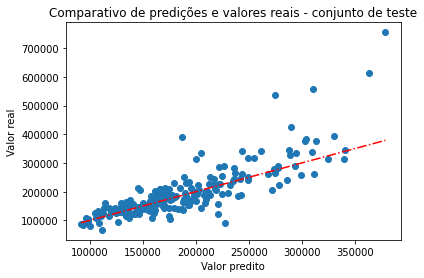

In [27]:
plt.scatter(y_pred, y_test)
plt.xlabel("Valor predito")
plt.ylabel("Valor real")

x = np.linspace(y_pred.min(), y_pred.max())
plt.plot(x, x, '-.r')
plt.title("Comparativo de predições e valores reais - conjunto de teste")

**Vamos incluir a normalização dos dados!**

In [32]:
# AINDA FALTAM PASSOS IMPORTANTES PARA UM BOM MODELO
# INCLUINDO NORMALIZAÇÃO

# normalização/padronização -> sempre com os dados de TREINAMENTO
scaler = StandardScaler()

# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
X_train_sc = scaler.fit_transform(X_train) # usando o conjunto de treinamento para definir a padronização
X_test_sc = scaler.transform(X_test)

# Instanciar o modelo
knn_reg = KNeighborsRegressor()

# Ajustar com os dados de treino - treinamento do modelo
knn_reg.fit(X_train_sc, y_train)

# Calcular a predição
y_pred2 = knn_reg.predict(X_test_sc)

# Avaliação do modelo
print_regression_evaluation_metrics(y_test, y_pred)

Métricas de avaliação: 
R^2: 0.78
MAE: 23891.49
RMSE: 41656.77
MAPE: 0.12


Text(0.5, 1.0, 'Comparativo de predições e valores reais - conjunto de teste')

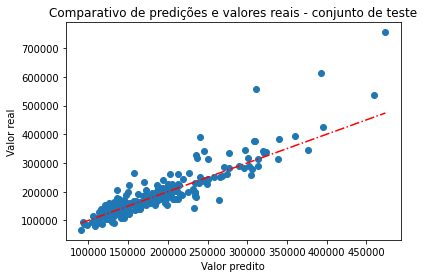

In [29]:
plt.scatter(y_pred, y_test)
plt.xlabel("Valor predito")
plt.ylabel("Valor real")

x = np.linspace(y_pred.min(), y_pred.max())
plt.plot(x, x, '-.r')
plt.title("Comparativo de predições e valores reais - conjunto de teste")

Vemos como, apenas com o scaling dos dados, já melhoramos consideravelmente nossos resultados!

In [33]:
def plot_predicted_vs_actual_values(y_test, y_pred, title_str):
    plt.scatter(y_pred, y_test)
    plt.xlabel("Valor predito")
    plt.ylabel("Valor real")

    x = np.linspace(y_pred.min(), y_pred.max())
    plt.plot(x, x, '-.r')
    plt.title(title_str)

Text(0.5, 0.98, 'Comparativo de predições - base de teste')

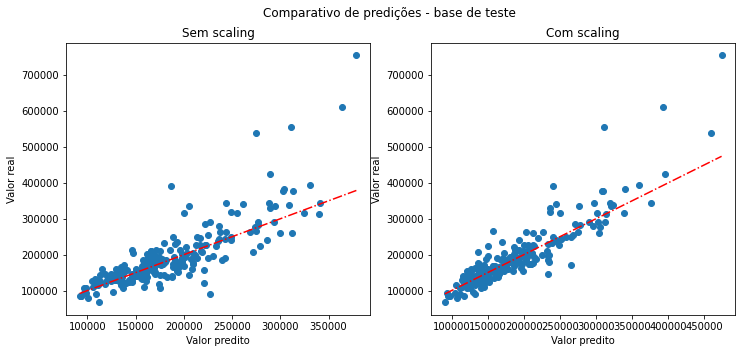

In [35]:
plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
plot_predicted_vs_actual_values(y_test, y_pred1, "Sem scaling")

plt.subplot(1,2,2)
plot_predicted_vs_actual_values(y_test, y_pred2, "Com scaling")

plt.suptitle("Comparativo de predições - base de teste")

Vimos que, com o simples scaling dos dados, já tivemos uma melhora considerável na capacidade de predição do nosso modelo de regressão. Vamos, agora, estudar em mais detalhes algumas ferramentas do scikit-learn que nos permitirão melhorar os modelos com mais facilidade!

___
## Ferramentas especiais do scikit-learn

### Grid Search

O [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) é uma estrutura que o sklearn proporciona para que seja feita **a busca exaustiva de hiperparâmetros de um estimador**.

Na prática, o que o gridsearch faz é **treinar diversos modelos com diferentes combinações de hiperparâmetros**, de modo a manter o melhor deles como o modelo final, tudo automaticamente! 

Tudo o que precisamos fazer é indicar quais os hiperparâmetros que queremos procurar: a **grade**!

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png" width=500>

Desta forma, tentamos automatizar o processo que fizemos manualmente na aula passada, de escolha do número ótimo de vizinhos para o KNN, por exemplo. Com o GridSearch, definimos um universo de valores possíveis a partir dos quais combinações de hiperparâmetros são testadas, e obtemos aquela para a qual o algoritmo performa melhor no conjunto de validação!

O Gridsearch avalia o melhor modelo segundo a métrica que passamos em `scoring`. [Clique aqui](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver as métricas disponíveis por padrão.

Mas o GS vai além: ele não calcula a métrica uma única vez, mas sim **várias vezes**, conforme especificado pelo parâmetro `cv`. No fim, o melhor modelo é o que tem o melhor scoring **médio** entre as vezes que é calculado.

O "cv" quer dizer **Cross Validation**, o método mais seguro de realizar um treinamento e avaliação de um modelo que conhecemos na aula passada!

<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600> 

**Dica de leitura complementar:** [documentação do sklearn sobre ajuste fino de hiperparâmetros](https://scikit-learn.org/stable/modules/grid_search.html#grid-search).


Vamos importar o [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [40]:
from sklearn.model_selection import GridSearchCV, KFold

In [38]:
knn_reg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [41]:
# Ajuste fomp de hiperparâmetros do KNN com GridSearch

# Definição da estrutura de validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)
metrica = "neg_mean_absolute_error" # definição da métrica de avaliação do estimador

# Procura dos melhores hiperparâmetros - gridsearch
# São 3 hiperparâmetros
# Vamos primeiro enfocar o número de vizinhos

# Definimos, em um dicionário, os valores do nosso "grid"
param_grid = {"n_neighbors": range(2,21)}

# definição do estimador
KNN = KNeighborsRegressor()

# grid search
grid_knn_reg = GridSearchCV(estimator = KNN,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = splitter)

In [42]:
grid_knn_reg

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 21)},
             scoring='neg_mean_absolute_error')

In [45]:
# Ajuste fomp de hiperparâmetros do KNN com GridSearch

# Definição da estrutura de validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)
metrica = "neg_mean_absolute_error" # definição da métrica de avaliação do estimador

# Procura dos melhores hiperparâmetros - gridsearch
# São 3 hiperparâmetros
# Vamos primeiro enfocar o número de vizinhos

# Definimos, em um dicionário, os valores do nosso "grid"
param_grid = {"n_neighbors": range(2,21)}

# definição do estimador
KNN = KNeighborsRegressor()

# grid search
grid_knn_reg = GridSearchCV(estimator = KNN,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = splitter,
                           verbose = 10)

grid_knn_reg.fit(X_train_sc, y_train) # aplicação do processo do GridSearch

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10; 1/19] START n_neighbors=2.............................................
[CV 1/10; 1/19] END .........n_neighbors=2;, score=-30952.700 total time=   0.0s
[CV 2/10; 1/19] START n_neighbors=2.............................................
[CV 2/10; 1/19] END .........n_neighbors=2;, score=-23611.611 total time=   0.0s
[CV 3/10; 1/19] START n_neighbors=2.............................................
[CV 3/10; 1/19] END .........n_neighbors=2;, score=-28067.094 total time=   0.0s
[CV 4/10; 1/19] START n_neighbors=2.............................................
[CV 4/10; 1/19] END .........n_neighbors=2;, score=-29956.622 total time=   0.0s
[CV 5/10; 1/19] START n_neighbors=2.............................................
[CV 5/10; 1/19] END .........n_neighbors=2;, score=-24198.844 total time=   0.0s
[CV 6/10; 1/19] START n_neighbors=2.............................................
[CV 6/10; 1/19] END .........n_neighbors=2;, s

[CV 7/10; 7/19] END .........n_neighbors=8;, score=-20134.829 total time=   0.0s
[CV 8/10; 7/19] START n_neighbors=8.............................................
[CV 8/10; 7/19] END .........n_neighbors=8;, score=-22545.480 total time=   0.0s
[CV 9/10; 7/19] START n_neighbors=8.............................................
[CV 9/10; 7/19] END .........n_neighbors=8;, score=-26366.732 total time=   0.0s
[CV 10/10; 7/19] START n_neighbors=8............................................
[CV 10/10; 7/19] END ........n_neighbors=8;, score=-25090.888 total time=   0.0s
[CV 1/10; 8/19] START n_neighbors=9.............................................
[CV 1/10; 8/19] END .........n_neighbors=9;, score=-23845.388 total time=   0.0s
[CV 2/10; 8/19] START n_neighbors=9.............................................
[CV 2/10; 8/19] END .........n_neighbors=9;, score=-21798.798 total time=   0.0s
[CV 3/10; 8/19] START n_neighbors=9.............................................
[CV 3/10; 8/19] END ........

[CV 3/10; 15/19] START n_neighbors=16...........................................
[CV 3/10; 15/19] END .......n_neighbors=16;, score=-23167.647 total time=   0.0s
[CV 4/10; 15/19] START n_neighbors=16...........................................
[CV 4/10; 15/19] END .......n_neighbors=16;, score=-26016.672 total time=   0.0s
[CV 5/10; 15/19] START n_neighbors=16...........................................
[CV 5/10; 15/19] END .......n_neighbors=16;, score=-21005.260 total time=   0.0s
[CV 6/10; 15/19] START n_neighbors=16...........................................
[CV 6/10; 15/19] END .......n_neighbors=16;, score=-16368.375 total time=   0.0s
[CV 7/10; 15/19] START n_neighbors=16...........................................
[CV 7/10; 15/19] END .......n_neighbors=16;, score=-20571.471 total time=   0.0s
[CV 8/10; 15/19] START n_neighbors=16...........................................
[CV 8/10; 15/19] END .......n_neighbors=16;, score=-24010.796 total time=   0.0s
[CV 9/10; 15/19] START n_nei

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 21)},
             scoring='neg_mean_absolute_error', verbose=10)

In [46]:
# Visualização dos melhores hiperparâmetros
grid_knn_reg.best_params_

{'n_neighbors': 13}

In [47]:
# visualização do melhor score para a métrica definida no processo
grid_knn_reg.best_score_

-22248.49556227792

In [50]:
# Avaliação com o GridSearch

# predições no próprio conjunto de treinamento
y_pred_train = grid_knn_reg.predict(X_train_sc)
print_regression_evaluation_metrics(y_train, y_pred_train)
print("\n")
# predições no conjunto de teste
y_pred_test = grid_knn_reg.predict(X_test_sc)
print_regression_evaluation_metrics(y_test, y_pred_test)

Métricas de avaliação: 
R^2: 0.80
MAE: 20698.19
RMSE: 36540.69
MAPE: 0.11


Métricas de avaliação: 
R^2: 0.74
MAE: 24061.83
RMSE: 45352.31
MAPE: 0.11


Vimos, assim, como funciona a implementação com o GridSearch! Vale lembrar que podemos otimizar outros hiperparâmetros além do número de vizinhos a serem usados pelo KNN. Será que isso produzirá melhores resultados?

Vamos, agora, otimizar também o tipo de métrica de distância e os pesos do algoritmo.

In [51]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [52]:
# Ajuste fomp de hiperparâmetros do KNN com GridSearch

# Definição da estrutura de validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)
metrica = "neg_mean_absolute_error" # definição da métrica de avaliação do estimador

# Procura dos melhores hiperparâmetros - gridsearch
# São 3 hiperparâmetros
# Vamos primeiro enfocar o número de vizinhos

# Definimos, em um dicionário, os valores do nosso "grid"
param_grid = {"n_neighbors": range(2,21),
             "metric": ["euclidean", "manhattan"],
             "weights": ["uniform", "distance"]}

# definição do estimador
KNN = KNeighborsRegressor()

# grid search
grid_knn_reg = GridSearchCV(estimator = KNN,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = splitter,
                           verbose = 10)

grid_knn_reg.fit(X_train_sc, y_train) # aplicação do processo do GridSearch

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START metric=euclidean, n_neighbors=2, weights=uniform..........
[CV 1/10; 1/76] END metric=euclidean, n_neighbors=2, weights=uniform;, score=-30952.700 total time=   0.0s
[CV 2/10; 1/76] START metric=euclidean, n_neighbors=2, weights=uniform..........
[CV 2/10; 1/76] END metric=euclidean, n_neighbors=2, weights=uniform;, score=-23611.611 total time=   0.0s
[CV 3/10; 1/76] START metric=euclidean, n_neighbors=2, weights=uniform..........
[CV 3/10; 1/76] END metric=euclidean, n_neighbors=2, weights=uniform;, score=-28067.094 total time=   0.0s
[CV 4/10; 1/76] START metric=euclidean, n_neighbors=2, weights=uniform..........
[CV 4/10; 1/76] END metric=euclidean, n_neighbors=2, weights=uniform;, score=-29956.622 total time=   0.0s
[CV 5/10; 1/76] START metric=euclidean, n_neighbors=2, weights=uniform..........
[CV 5/10; 1/76] END metric=euclidean, n_neighbors=2, weights=uniform;, score=-24198.844 total time=   0.

[CV 7/10; 7/76] END metric=euclidean, n_neighbors=5, weights=uniform;, score=-20775.308 total time=   0.0s
[CV 8/10; 7/76] START metric=euclidean, n_neighbors=5, weights=uniform..........
[CV 8/10; 7/76] END metric=euclidean, n_neighbors=5, weights=uniform;, score=-22894.182 total time=   0.0s
[CV 9/10; 7/76] START metric=euclidean, n_neighbors=5, weights=uniform..........
[CV 9/10; 7/76] END metric=euclidean, n_neighbors=5, weights=uniform;, score=-29463.180 total time=   0.0s
[CV 10/10; 7/76] START metric=euclidean, n_neighbors=5, weights=uniform.........
[CV 10/10; 7/76] END metric=euclidean, n_neighbors=5, weights=uniform;, score=-24546.683 total time=   0.0s
[CV 1/10; 8/76] START metric=euclidean, n_neighbors=5, weights=distance.........
[CV 1/10; 8/76] END metric=euclidean, n_neighbors=5, weights=distance;, score=-25753.132 total time=   0.0s
[CV 2/10; 8/76] START metric=euclidean, n_neighbors=5, weights=distance.........
[CV 2/10; 8/76] END metric=euclidean, n_neighbors=5, weigh

[CV 6/10; 14/76] END metric=euclidean, n_neighbors=8, weights=distance;, score=-17015.962 total time=   0.0s
[CV 7/10; 14/76] START metric=euclidean, n_neighbors=8, weights=distance........
[CV 7/10; 14/76] END metric=euclidean, n_neighbors=8, weights=distance;, score=-19851.289 total time=   0.0s
[CV 8/10; 14/76] START metric=euclidean, n_neighbors=8, weights=distance........
[CV 8/10; 14/76] END metric=euclidean, n_neighbors=8, weights=distance;, score=-21895.401 total time=   0.0s
[CV 9/10; 14/76] START metric=euclidean, n_neighbors=8, weights=distance........
[CV 9/10; 14/76] END metric=euclidean, n_neighbors=8, weights=distance;, score=-26334.350 total time=   0.0s
[CV 10/10; 14/76] START metric=euclidean, n_neighbors=8, weights=distance.......
[CV 10/10; 14/76] END metric=euclidean, n_neighbors=8, weights=distance;, score=-24495.631 total time=   0.0s
[CV 1/10; 15/76] START metric=euclidean, n_neighbors=9, weights=uniform.........
[CV 1/10; 15/76] END metric=euclidean, n_neighbor

[CV 10/10; 20/76] END metric=euclidean, n_neighbors=11, weights=distance;, score=-24041.644 total time=   0.0s
[CV 1/10; 21/76] START metric=euclidean, n_neighbors=12, weights=uniform........
[CV 1/10; 21/76] END metric=euclidean, n_neighbors=12, weights=uniform;, score=-22927.971 total time=   0.0s
[CV 2/10; 21/76] START metric=euclidean, n_neighbors=12, weights=uniform........
[CV 2/10; 21/76] END metric=euclidean, n_neighbors=12, weights=uniform;, score=-21794.636 total time=   0.0s
[CV 3/10; 21/76] START metric=euclidean, n_neighbors=12, weights=uniform........
[CV 3/10; 21/76] END metric=euclidean, n_neighbors=12, weights=uniform;, score=-22901.212 total time=   0.0s
[CV 4/10; 21/76] START metric=euclidean, n_neighbors=12, weights=uniform........
[CV 4/10; 21/76] END metric=euclidean, n_neighbors=12, weights=uniform;, score=-25313.142 total time=   0.0s
[CV 5/10; 21/76] START metric=euclidean, n_neighbors=12, weights=uniform........
[CV 5/10; 21/76] END metric=euclidean, n_neighbo

[CV 7/10; 26/76] END metric=euclidean, n_neighbors=14, weights=distance;, score=-20140.944 total time=   0.0s
[CV 8/10; 26/76] START metric=euclidean, n_neighbors=14, weights=distance.......
[CV 8/10; 26/76] END metric=euclidean, n_neighbors=14, weights=distance;, score=-23262.931 total time=   0.0s
[CV 9/10; 26/76] START metric=euclidean, n_neighbors=14, weights=distance.......
[CV 9/10; 26/76] END metric=euclidean, n_neighbors=14, weights=distance;, score=-25580.283 total time=   0.0s
[CV 10/10; 26/76] START metric=euclidean, n_neighbors=14, weights=distance......
[CV 10/10; 26/76] END metric=euclidean, n_neighbors=14, weights=distance;, score=-23240.860 total time=   0.0s
[CV 1/10; 27/76] START metric=euclidean, n_neighbors=15, weights=uniform........
[CV 1/10; 27/76] END metric=euclidean, n_neighbors=15, weights=uniform;, score=-22739.689 total time=   0.0s
[CV 2/10; 27/76] START metric=euclidean, n_neighbors=15, weights=uniform........
[CV 2/10; 27/76] END metric=euclidean, n_neig

[CV 7/10; 32/76] END metric=euclidean, n_neighbors=17, weights=distance;, score=-20393.929 total time=   0.0s
[CV 8/10; 32/76] START metric=euclidean, n_neighbors=17, weights=distance.......
[CV 8/10; 32/76] END metric=euclidean, n_neighbors=17, weights=distance;, score=-23265.229 total time=   0.0s
[CV 9/10; 32/76] START metric=euclidean, n_neighbors=17, weights=distance.......
[CV 9/10; 32/76] END metric=euclidean, n_neighbors=17, weights=distance;, score=-25633.072 total time=   0.0s
[CV 10/10; 32/76] START metric=euclidean, n_neighbors=17, weights=distance......
[CV 10/10; 32/76] END metric=euclidean, n_neighbors=17, weights=distance;, score=-22765.733 total time=   0.0s
[CV 1/10; 33/76] START metric=euclidean, n_neighbors=18, weights=uniform........
[CV 1/10; 33/76] END metric=euclidean, n_neighbors=18, weights=uniform;, score=-22994.082 total time=   0.0s
[CV 2/10; 33/76] START metric=euclidean, n_neighbors=18, weights=uniform........
[CV 2/10; 33/76] END metric=euclidean, n_neig

[CV 5/10; 39/76] END metric=manhattan, n_neighbors=2, weights=uniform;, score=-21111.611 total time=   0.0s
[CV 6/10; 39/76] START metric=manhattan, n_neighbors=2, weights=uniform.........
[CV 6/10; 39/76] END metric=manhattan, n_neighbors=2, weights=uniform;, score=-17754.050 total time=   0.0s
[CV 7/10; 39/76] START metric=manhattan, n_neighbors=2, weights=uniform.........
[CV 7/10; 39/76] END metric=manhattan, n_neighbors=2, weights=uniform;, score=-19618.713 total time=   0.0s
[CV 8/10; 39/76] START metric=manhattan, n_neighbors=2, weights=uniform.........
[CV 8/10; 39/76] END metric=manhattan, n_neighbors=2, weights=uniform;, score=-20127.848 total time=   0.0s
[CV 9/10; 39/76] START metric=manhattan, n_neighbors=2, weights=uniform.........
[CV 9/10; 39/76] END metric=manhattan, n_neighbors=2, weights=uniform;, score=-25851.680 total time=   0.0s
[CV 10/10; 39/76] START metric=manhattan, n_neighbors=2, weights=uniform........
[CV 10/10; 39/76] END metric=manhattan, n_neighbors=2, 

[CV 1/10; 47/76] END metric=manhattan, n_neighbors=6, weights=uniform;, score=-22528.737 total time=   0.0s
[CV 2/10; 47/76] START metric=manhattan, n_neighbors=6, weights=uniform.........
[CV 2/10; 47/76] END metric=manhattan, n_neighbors=6, weights=uniform;, score=-22072.737 total time=   0.0s
[CV 3/10; 47/76] START metric=manhattan, n_neighbors=6, weights=uniform.........
[CV 3/10; 47/76] END metric=manhattan, n_neighbors=6, weights=uniform;, score=-21620.217 total time=   0.0s
[CV 4/10; 47/76] START metric=manhattan, n_neighbors=6, weights=uniform.........
[CV 4/10; 47/76] END metric=manhattan, n_neighbors=6, weights=uniform;, score=-25534.489 total time=   0.0s
[CV 5/10; 47/76] START metric=manhattan, n_neighbors=6, weights=uniform.........
[CV 5/10; 47/76] END metric=manhattan, n_neighbors=6, weights=uniform;, score=-20245.172 total time=   0.0s
[CV 6/10; 47/76] START metric=manhattan, n_neighbors=6, weights=uniform.........
[CV 6/10; 47/76] END metric=manhattan, n_neighbors=6, w

[CV 6/10; 54/76] END metric=manhattan, n_neighbors=9, weights=distance;, score=-15121.237 total time=   0.0s
[CV 7/10; 54/76] START metric=manhattan, n_neighbors=9, weights=distance........
[CV 7/10; 54/76] END metric=manhattan, n_neighbors=9, weights=distance;, score=-17659.238 total time=   0.0s
[CV 8/10; 54/76] START metric=manhattan, n_neighbors=9, weights=distance........
[CV 8/10; 54/76] END metric=manhattan, n_neighbors=9, weights=distance;, score=-20171.224 total time=   0.0s
[CV 9/10; 54/76] START metric=manhattan, n_neighbors=9, weights=distance........
[CV 9/10; 54/76] END metric=manhattan, n_neighbors=9, weights=distance;, score=-23521.886 total time=   0.0s
[CV 10/10; 54/76] START metric=manhattan, n_neighbors=9, weights=distance.......
[CV 10/10; 54/76] END metric=manhattan, n_neighbors=9, weights=distance;, score=-19703.173 total time=   0.0s
[CV 1/10; 55/76] START metric=manhattan, n_neighbors=10, weights=uniform........
[CV 1/10; 55/76] END metric=manhattan, n_neighbor

[CV 1/10; 61/76] END metric=manhattan, n_neighbors=13, weights=uniform;, score=-22022.050 total time=   0.0s
[CV 2/10; 61/76] START metric=manhattan, n_neighbors=13, weights=uniform........
[CV 2/10; 61/76] END metric=manhattan, n_neighbors=13, weights=uniform;, score=-21776.856 total time=   0.0s
[CV 3/10; 61/76] START metric=manhattan, n_neighbors=13, weights=uniform........
[CV 3/10; 61/76] END metric=manhattan, n_neighbors=13, weights=uniform;, score=-21367.044 total time=   0.0s
[CV 4/10; 61/76] START metric=manhattan, n_neighbors=13, weights=uniform........
[CV 4/10; 61/76] END metric=manhattan, n_neighbors=13, weights=uniform;, score=-24744.436 total time=   0.0s
[CV 5/10; 61/76] START metric=manhattan, n_neighbors=13, weights=uniform........
[CV 5/10; 61/76] END metric=manhattan, n_neighbors=13, weights=uniform;, score=-20250.771 total time=   0.0s
[CV 6/10; 61/76] START metric=manhattan, n_neighbors=13, weights=uniform........
[CV 6/10; 61/76] END metric=manhattan, n_neighbors

[CV 4/10; 68/76] END metric=manhattan, n_neighbors=16, weights=distance;, score=-24248.934 total time=   0.0s
[CV 5/10; 68/76] START metric=manhattan, n_neighbors=16, weights=distance.......
[CV 5/10; 68/76] END metric=manhattan, n_neighbors=16, weights=distance;, score=-20203.743 total time=   0.0s
[CV 6/10; 68/76] START metric=manhattan, n_neighbors=16, weights=distance.......
[CV 6/10; 68/76] END metric=manhattan, n_neighbors=16, weights=distance;, score=-14961.479 total time=   0.0s
[CV 7/10; 68/76] START metric=manhattan, n_neighbors=16, weights=distance.......
[CV 7/10; 68/76] END metric=manhattan, n_neighbors=16, weights=distance;, score=-18615.157 total time=   0.0s
[CV 8/10; 68/76] START metric=manhattan, n_neighbors=16, weights=distance.......
[CV 8/10; 68/76] END metric=manhattan, n_neighbors=16, weights=distance;, score=-21204.021 total time=   0.0s
[CV 9/10; 68/76] START metric=manhattan, n_neighbors=16, weights=distance.......
[CV 9/10; 68/76] END metric=manhattan, n_neig

[CV 8/10; 75/76] END metric=manhattan, n_neighbors=20, weights=uniform;, score=-22931.633 total time=   0.0s
[CV 9/10; 75/76] START metric=manhattan, n_neighbors=20, weights=uniform........
[CV 9/10; 75/76] END metric=manhattan, n_neighbors=20, weights=uniform;, score=-23578.254 total time=   0.0s
[CV 10/10; 75/76] START metric=manhattan, n_neighbors=20, weights=uniform.......
[CV 10/10; 75/76] END metric=manhattan, n_neighbors=20, weights=uniform;, score=-20552.321 total time=   0.0s
[CV 1/10; 76/76] START metric=manhattan, n_neighbors=20, weights=distance.......
[CV 1/10; 76/76] END metric=manhattan, n_neighbors=20, weights=distance;, score=-22140.333 total time=   0.0s
[CV 2/10; 76/76] START metric=manhattan, n_neighbors=20, weights=distance.......
[CV 2/10; 76/76] END metric=manhattan, n_neighbors=20, weights=distance;, score=-22387.171 total time=   0.0s
[CV 3/10; 76/76] START metric=manhattan, n_neighbors=20, weights=distance.......
[CV 3/10; 76/76] END metric=manhattan, n_neighb

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(2, 21),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=10)

In [53]:
# melhores parâmetros
grid_knn_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

In [54]:
# melhor métrica
grid_knn_reg.best_score_

-20346.17149480901

In [55]:
# Avaliação com o GridSearch

# predições no próprio conjunto de treinamento
y_pred_train = grid_knn_reg.predict(X_train_sc)
print_regression_evaluation_metrics(y_train, y_pred_train)
print("\n")
# predições no conjunto de teste
y_pred_test = grid_knn_reg.predict(X_test_sc)
print_regression_evaluation_metrics(y_test, y_pred_test)

Métricas de avaliação: 
R^2: 1.00
MAE: 0.00
RMSE: 0.00
MAPE: 0.00


Métricas de avaliação: 
R^2: 0.79
MAE: 21405.52
RMSE: 40674.96
MAPE: 0.10


Vemos que os resultados foram consideravelmente melhores, principalmente para o próprio conjunto de treinamento! Vamos plotá-los?

Text(0.5, 0.98, 'Avaliação da regressão')

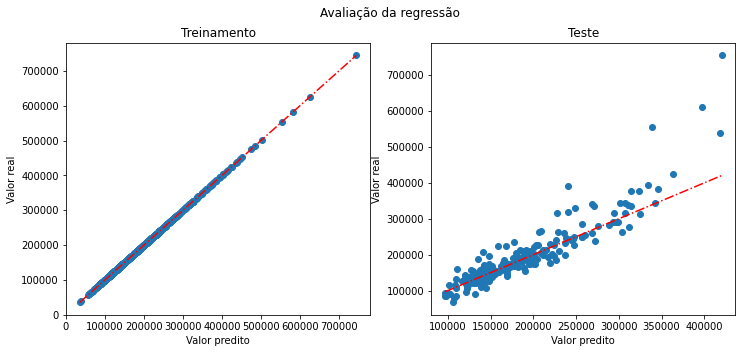

In [61]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plot_predicted_vs_actual_values(y_train, y_pred_train, "Treinamento")

plt.subplot(1,2,2)
plot_predicted_vs_actual_values(y_test, y_pred_test, "Teste")

plt.suptitle("Avaliação da regressão")

Com o gráfico acima, vemos que temos um **ajuste muitíssimo bom para os dados de treinamento, mas uma generalização consideravelmente pior para os dados de teste**. Podemos estar diante de um caso de **overfitting, ou sobreajuste**, do modelo!

___

#### Overfitting

Quando ajustamos nossos classificadores/regressores aos dados, podemos nos deparar com um resultado de **sobreajuste**, ou, até mesmo, **subajuste**.
<img src = "https://www.mathworks.com/discovery/overfitting/_jcr_content/mainParsys/image.adapt.full.medium.svg/1686825007300.svg">

Idealmente, gostaríamos que nosso modelo fosse capaz de fazer generalizações/inferências a partir de uma amostra de treinamento, quando é confrontado com uma nova amostra, fora deste conjunto de treino. No entanto, na situação de **subajuste, ou underfitting**, o modelo não descreve bem o comportamento dos dados de treino (e, tampouco, de teste). Por outro lado, no **sobreajuste, ou overfitting**, o modelo se ajusta muito bem aos dados de treino, mas é incapaz de generalizar bem em um novo conjunto de teste/validação (porque está "muito ajustado" à estrutura dos dados de treinamento).

No cenário ideal, gostaríamos de um "meio-termo" entre as duas situações descritas acima.

<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/Screenshot-2020-02-06-at-11.09.13.png" width = 600>

[Leitura complementar sobre identificação de overfitting](https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e#:~:text=We%20can%20identify%20overfitting%20by,fit%20for%20the%20training%20data.)

___
Com isso em mente, vamos voltar ao nosso problema e **limitar o valor de K**, para avaliar se conseguimos diminuir o possível sobreajuste ocorrendo em nosso último modelo.

In [62]:
# Ajuste fomp de hiperparâmetros do KNN com GridSearch

# Definição da estrutura de validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)
metrica = "neg_mean_absolute_error" # definição da métrica de avaliação do estimador

# Procura dos melhores hiperparâmetros - gridsearch
# São 3 hiperparâmetros
# Vamos primeiro enfocar o número de vizinhos

# Definimos, em um dicionário, os valores do nosso "grid"
param_grid = {"n_neighbors": range(50,100),
             "metric": ["euclidean", "manhattan"],
             "weights": ["uniform", "distance"]}

# definição do estimador
KNN = KNeighborsRegressor()

# grid search
grid_knn_reg = GridSearchCV(estimator = KNN,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = splitter,
                           verbose = 10)

grid_knn_reg.fit(X_train_sc, y_train) # aplicação do processo do GridSearch

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV 1/10; 1/200] START metric=euclidean, n_neighbors=50, weights=uniform........
[CV 1/10; 1/200] END metric=euclidean, n_neighbors=50, weights=uniform;, score=-24413.707 total time=   0.0s
[CV 2/10; 1/200] START metric=euclidean, n_neighbors=50, weights=uniform........
[CV 2/10; 1/200] END metric=euclidean, n_neighbors=50, weights=uniform;, score=-26814.785 total time=   0.0s
[CV 3/10; 1/200] START metric=euclidean, n_neighbors=50, weights=uniform........
[CV 3/10; 1/200] END metric=euclidean, n_neighbors=50, weights=uniform;, score=-27327.033 total time=   0.0s
[CV 4/10; 1/200] START metric=euclidean, n_neighbors=50, weights=uniform........
[CV 4/10; 1/200] END metric=euclidean, n_neighbors=50, weights=uniform;, score=-28703.768 total time=   0.0s
[CV 5/10; 1/200] START metric=euclidean, n_neighbors=50, weights=uniform........
[CV 5/10; 1/200] END metric=euclidean, n_neighbors=50, weights=uniform;, score=-22253.911 tota

[CV 10/10; 6/200] END metric=euclidean, n_neighbors=52, weights=distance;, score=-24751.414 total time=   0.0s
[CV 1/10; 7/200] START metric=euclidean, n_neighbors=53, weights=uniform........
[CV 1/10; 7/200] END metric=euclidean, n_neighbors=53, weights=uniform;, score=-24518.412 total time=   0.0s
[CV 2/10; 7/200] START metric=euclidean, n_neighbors=53, weights=uniform........
[CV 2/10; 7/200] END metric=euclidean, n_neighbors=53, weights=uniform;, score=-27036.338 total time=   0.0s
[CV 3/10; 7/200] START metric=euclidean, n_neighbors=53, weights=uniform........
[CV 3/10; 7/200] END metric=euclidean, n_neighbors=53, weights=uniform;, score=-27408.257 total time=   0.0s
[CV 4/10; 7/200] START metric=euclidean, n_neighbors=53, weights=uniform........
[CV 4/10; 7/200] END metric=euclidean, n_neighbors=53, weights=uniform;, score=-28811.133 total time=   0.0s
[CV 5/10; 7/200] START metric=euclidean, n_neighbors=53, weights=uniform........
[CV 5/10; 7/200] END metric=euclidean, n_neighbo

[CV 1/10; 13/200] END metric=euclidean, n_neighbors=56, weights=uniform;, score=-24630.615 total time=   0.0s
[CV 2/10; 13/200] START metric=euclidean, n_neighbors=56, weights=uniform.......
[CV 2/10; 13/200] END metric=euclidean, n_neighbors=56, weights=uniform;, score=-27473.901 total time=   0.0s
[CV 3/10; 13/200] START metric=euclidean, n_neighbors=56, weights=uniform.......
[CV 3/10; 13/200] END metric=euclidean, n_neighbors=56, weights=uniform;, score=-27406.472 total time=   0.0s
[CV 4/10; 13/200] START metric=euclidean, n_neighbors=56, weights=uniform.......
[CV 4/10; 13/200] END metric=euclidean, n_neighbors=56, weights=uniform;, score=-29130.043 total time=   0.0s
[CV 5/10; 13/200] START metric=euclidean, n_neighbors=56, weights=uniform.......
[CV 5/10; 13/200] END metric=euclidean, n_neighbors=56, weights=uniform;, score=-22947.518 total time=   0.0s
[CV 6/10; 13/200] START metric=euclidean, n_neighbors=56, weights=uniform.......
[CV 6/10; 13/200] END metric=euclidean, n_nei

[CV 9/10; 18/200] END metric=euclidean, n_neighbors=58, weights=distance;, score=-27595.048 total time=   0.0s
[CV 10/10; 18/200] START metric=euclidean, n_neighbors=58, weights=distance.....
[CV 10/10; 18/200] END metric=euclidean, n_neighbors=58, weights=distance;, score=-25436.551 total time=   0.0s
[CV 1/10; 19/200] START metric=euclidean, n_neighbors=59, weights=uniform.......
[CV 1/10; 19/200] END metric=euclidean, n_neighbors=59, weights=uniform;, score=-24839.625 total time=   0.0s
[CV 2/10; 19/200] START metric=euclidean, n_neighbors=59, weights=uniform.......
[CV 2/10; 19/200] END metric=euclidean, n_neighbors=59, weights=uniform;, score=-27812.796 total time=   0.0s
[CV 3/10; 19/200] START metric=euclidean, n_neighbors=59, weights=uniform.......
[CV 3/10; 19/200] END metric=euclidean, n_neighbors=59, weights=uniform;, score=-27731.082 total time=   0.0s
[CV 4/10; 19/200] START metric=euclidean, n_neighbors=59, weights=uniform.......
[CV 4/10; 19/200] END metric=euclidean, n_

[CV 7/10; 24/200] END metric=euclidean, n_neighbors=61, weights=distance;, score=-23970.487 total time=   0.0s
[CV 8/10; 24/200] START metric=euclidean, n_neighbors=61, weights=distance......
[CV 8/10; 24/200] END metric=euclidean, n_neighbors=61, weights=distance;, score=-25795.364 total time=   0.0s
[CV 9/10; 24/200] START metric=euclidean, n_neighbors=61, weights=distance......
[CV 9/10; 24/200] END metric=euclidean, n_neighbors=61, weights=distance;, score=-27871.584 total time=   0.0s
[CV 10/10; 24/200] START metric=euclidean, n_neighbors=61, weights=distance.....
[CV 10/10; 24/200] END metric=euclidean, n_neighbors=61, weights=distance;, score=-25691.755 total time=   0.0s
[CV 1/10; 25/200] START metric=euclidean, n_neighbors=62, weights=uniform.......
[CV 1/10; 25/200] END metric=euclidean, n_neighbors=62, weights=uniform;, score=-24751.654 total time=   0.0s
[CV 2/10; 25/200] START metric=euclidean, n_neighbors=62, weights=uniform.......
[CV 2/10; 25/200] END metric=euclidean, 

[CV 9/10; 30/200] END metric=euclidean, n_neighbors=64, weights=distance;, score=-27999.820 total time=   0.0s
[CV 10/10; 30/200] START metric=euclidean, n_neighbors=64, weights=distance.....
[CV 10/10; 30/200] END metric=euclidean, n_neighbors=64, weights=distance;, score=-25755.942 total time=   0.0s
[CV 1/10; 31/200] START metric=euclidean, n_neighbors=65, weights=uniform.......
[CV 1/10; 31/200] END metric=euclidean, n_neighbors=65, weights=uniform;, score=-24942.750 total time=   0.0s
[CV 2/10; 31/200] START metric=euclidean, n_neighbors=65, weights=uniform.......
[CV 2/10; 31/200] END metric=euclidean, n_neighbors=65, weights=uniform;, score=-28520.077 total time=   0.0s
[CV 3/10; 31/200] START metric=euclidean, n_neighbors=65, weights=uniform.......
[CV 3/10; 31/200] END metric=euclidean, n_neighbors=65, weights=uniform;, score=-28368.003 total time=   0.0s
[CV 4/10; 31/200] START metric=euclidean, n_neighbors=65, weights=uniform.......
[CV 4/10; 31/200] END metric=euclidean, n_

[CV 10/10; 36/200] END metric=euclidean, n_neighbors=67, weights=distance;, score=-25871.933 total time=   0.0s
[CV 1/10; 37/200] START metric=euclidean, n_neighbors=68, weights=uniform.......
[CV 1/10; 37/200] END metric=euclidean, n_neighbors=68, weights=uniform;, score=-24794.974 total time=   0.0s
[CV 2/10; 37/200] START metric=euclidean, n_neighbors=68, weights=uniform.......
[CV 2/10; 37/200] END metric=euclidean, n_neighbors=68, weights=uniform;, score=-28705.999 total time=   0.0s
[CV 3/10; 37/200] START metric=euclidean, n_neighbors=68, weights=uniform.......
[CV 3/10; 37/200] END metric=euclidean, n_neighbors=68, weights=uniform;, score=-28724.051 total time=   0.0s
[CV 4/10; 37/200] START metric=euclidean, n_neighbors=68, weights=uniform.......
[CV 4/10; 37/200] END metric=euclidean, n_neighbors=68, weights=uniform;, score=-29643.071 total time=   0.0s
[CV 5/10; 37/200] START metric=euclidean, n_neighbors=68, weights=uniform.......
[CV 5/10; 37/200] END metric=euclidean, n_n

[CV 10/10; 43/200] END metric=euclidean, n_neighbors=71, weights=uniform;, score=-26814.266 total time=   0.0s
[CV 1/10; 44/200] START metric=euclidean, n_neighbors=71, weights=distance......
[CV 1/10; 44/200] END metric=euclidean, n_neighbors=71, weights=distance;, score=-24137.114 total time=   0.0s
[CV 2/10; 44/200] START metric=euclidean, n_neighbors=71, weights=distance......
[CV 2/10; 44/200] END metric=euclidean, n_neighbors=71, weights=distance;, score=-28111.645 total time=   0.0s
[CV 3/10; 44/200] START metric=euclidean, n_neighbors=71, weights=distance......
[CV 3/10; 44/200] END metric=euclidean, n_neighbors=71, weights=distance;, score=-27997.696 total time=   0.0s
[CV 4/10; 44/200] START metric=euclidean, n_neighbors=71, weights=distance......
[CV 4/10; 44/200] END metric=euclidean, n_neighbors=71, weights=distance;, score=-29219.753 total time=   0.0s
[CV 5/10; 44/200] START metric=euclidean, n_neighbors=71, weights=distance......
[CV 5/10; 44/200] END metric=euclidean, 

[CV 7/10; 49/200] END metric=euclidean, n_neighbors=74, weights=uniform;, score=-24927.119 total time=   0.0s
[CV 8/10; 49/200] START metric=euclidean, n_neighbors=74, weights=uniform.......
[CV 8/10; 49/200] END metric=euclidean, n_neighbors=74, weights=uniform;, score=-26912.674 total time=   0.0s
[CV 9/10; 49/200] START metric=euclidean, n_neighbors=74, weights=uniform.......
[CV 9/10; 49/200] END metric=euclidean, n_neighbors=74, weights=uniform;, score=-28506.345 total time=   0.0s
[CV 10/10; 49/200] START metric=euclidean, n_neighbors=74, weights=uniform......
[CV 10/10; 49/200] END metric=euclidean, n_neighbors=74, weights=uniform;, score=-26771.398 total time=   0.0s
[CV 1/10; 50/200] START metric=euclidean, n_neighbors=74, weights=distance......
[CV 1/10; 50/200] END metric=euclidean, n_neighbors=74, weights=distance;, score=-24342.220 total time=   0.0s
[CV 2/10; 50/200] START metric=euclidean, n_neighbors=74, weights=distance......
[CV 2/10; 50/200] END metric=euclidean, n_n

[CV 7/10; 55/200] START metric=euclidean, n_neighbors=77, weights=uniform.......
[CV 7/10; 55/200] END metric=euclidean, n_neighbors=77, weights=uniform;, score=-24978.438 total time=   0.0s
[CV 8/10; 55/200] START metric=euclidean, n_neighbors=77, weights=uniform.......
[CV 8/10; 55/200] END metric=euclidean, n_neighbors=77, weights=uniform;, score=-26854.115 total time=   0.0s
[CV 9/10; 55/200] START metric=euclidean, n_neighbors=77, weights=uniform.......
[CV 9/10; 55/200] END metric=euclidean, n_neighbors=77, weights=uniform;, score=-28601.027 total time=   0.0s
[CV 10/10; 55/200] START metric=euclidean, n_neighbors=77, weights=uniform......
[CV 10/10; 55/200] END metric=euclidean, n_neighbors=77, weights=uniform;, score=-26937.125 total time=   0.0s
[CV 1/10; 56/200] START metric=euclidean, n_neighbors=77, weights=distance......
[CV 1/10; 56/200] END metric=euclidean, n_neighbors=77, weights=distance;, score=-24395.708 total time=   0.0s
[CV 2/10; 56/200] START metric=euclidean, n

[CV 6/10; 61/200] END metric=euclidean, n_neighbors=80, weights=uniform;, score=-18523.395 total time=   0.0s
[CV 7/10; 61/200] START metric=euclidean, n_neighbors=80, weights=uniform.......
[CV 7/10; 61/200] END metric=euclidean, n_neighbors=80, weights=uniform;, score=-25141.064 total time=   0.0s
[CV 8/10; 61/200] START metric=euclidean, n_neighbors=80, weights=uniform.......
[CV 8/10; 61/200] END metric=euclidean, n_neighbors=80, weights=uniform;, score=-26895.526 total time=   0.0s
[CV 9/10; 61/200] START metric=euclidean, n_neighbors=80, weights=uniform.......
[CV 9/10; 61/200] END metric=euclidean, n_neighbors=80, weights=uniform;, score=-28669.132 total time=   0.0s
[CV 10/10; 61/200] START metric=euclidean, n_neighbors=80, weights=uniform......
[CV 10/10; 61/200] END metric=euclidean, n_neighbors=80, weights=uniform;, score=-26971.988 total time=   0.0s
[CV 1/10; 62/200] START metric=euclidean, n_neighbors=80, weights=distance......
[CV 1/10; 62/200] END metric=euclidean, n_ne

[CV 2/10; 67/200] END metric=euclidean, n_neighbors=83, weights=uniform;, score=-29364.818 total time=   0.0s
[CV 3/10; 67/200] START metric=euclidean, n_neighbors=83, weights=uniform.......
[CV 3/10; 67/200] END metric=euclidean, n_neighbors=83, weights=uniform;, score=-29240.386 total time=   0.0s
[CV 4/10; 67/200] START metric=euclidean, n_neighbors=83, weights=uniform.......
[CV 4/10; 67/200] END metric=euclidean, n_neighbors=83, weights=uniform;, score=-30350.079 total time=   0.0s
[CV 5/10; 67/200] START metric=euclidean, n_neighbors=83, weights=uniform.......
[CV 5/10; 67/200] END metric=euclidean, n_neighbors=83, weights=uniform;, score=-24252.151 total time=   0.0s
[CV 6/10; 67/200] START metric=euclidean, n_neighbors=83, weights=uniform.......
[CV 6/10; 67/200] END metric=euclidean, n_neighbors=83, weights=uniform;, score=-18468.123 total time=   0.0s
[CV 7/10; 67/200] START metric=euclidean, n_neighbors=83, weights=uniform.......
[CV 7/10; 67/200] END metric=euclidean, n_nei

[CV 10/10; 72/200] END metric=euclidean, n_neighbors=85, weights=distance;, score=-26332.145 total time=   0.0s
[CV 1/10; 73/200] START metric=euclidean, n_neighbors=86, weights=uniform.......
[CV 1/10; 73/200] END metric=euclidean, n_neighbors=86, weights=uniform;, score=-25013.219 total time=   0.0s
[CV 2/10; 73/200] START metric=euclidean, n_neighbors=86, weights=uniform.......
[CV 2/10; 73/200] END metric=euclidean, n_neighbors=86, weights=uniform;, score=-29449.779 total time=   0.0s
[CV 3/10; 73/200] START metric=euclidean, n_neighbors=86, weights=uniform.......
[CV 3/10; 73/200] END metric=euclidean, n_neighbors=86, weights=uniform;, score=-29324.275 total time=   0.0s
[CV 4/10; 73/200] START metric=euclidean, n_neighbors=86, weights=uniform.......
[CV 4/10; 73/200] END metric=euclidean, n_neighbors=86, weights=uniform;, score=-30370.931 total time=   0.0s
[CV 5/10; 73/200] START metric=euclidean, n_neighbors=86, weights=uniform.......
[CV 5/10; 73/200] END metric=euclidean, n_n

[CV 6/10; 78/200] START metric=euclidean, n_neighbors=88, weights=distance......
[CV 6/10; 78/200] END metric=euclidean, n_neighbors=88, weights=distance;, score=-18132.972 total time=   0.0s
[CV 7/10; 78/200] START metric=euclidean, n_neighbors=88, weights=distance......
[CV 7/10; 78/200] END metric=euclidean, n_neighbors=88, weights=distance;, score=-24931.624 total time=   0.0s
[CV 8/10; 78/200] START metric=euclidean, n_neighbors=88, weights=distance......
[CV 8/10; 78/200] END metric=euclidean, n_neighbors=88, weights=distance;, score=-26697.179 total time=   0.0s
[CV 9/10; 78/200] START metric=euclidean, n_neighbors=88, weights=distance......
[CV 9/10; 78/200] END metric=euclidean, n_neighbors=88, weights=distance;, score=-28433.230 total time=   0.0s
[CV 10/10; 78/200] START metric=euclidean, n_neighbors=88, weights=distance.....
[CV 10/10; 78/200] END metric=euclidean, n_neighbors=88, weights=distance;, score=-26418.559 total time=   0.0s
[CV 1/10; 79/200] START metric=euclidea

[CV 3/10; 84/200] END metric=euclidean, n_neighbors=91, weights=distance;, score=-28700.771 total time=   0.0s
[CV 4/10; 84/200] START metric=euclidean, n_neighbors=91, weights=distance......
[CV 4/10; 84/200] END metric=euclidean, n_neighbors=91, weights=distance;, score=-30026.958 total time=   0.0s
[CV 5/10; 84/200] START metric=euclidean, n_neighbors=91, weights=distance......
[CV 5/10; 84/200] END metric=euclidean, n_neighbors=91, weights=distance;, score=-23493.135 total time=   0.0s
[CV 6/10; 84/200] START metric=euclidean, n_neighbors=91, weights=distance......
[CV 6/10; 84/200] END metric=euclidean, n_neighbors=91, weights=distance;, score=-18185.340 total time=   0.0s
[CV 7/10; 84/200] START metric=euclidean, n_neighbors=91, weights=distance......
[CV 7/10; 84/200] END metric=euclidean, n_neighbors=91, weights=distance;, score=-25053.552 total time=   0.0s
[CV 8/10; 84/200] START metric=euclidean, n_neighbors=91, weights=distance......
[CV 8/10; 84/200] END metric=euclidean, 

[CV 10/10; 89/200] END metric=euclidean, n_neighbors=94, weights=uniform;, score=-27290.149 total time=   0.0s
[CV 1/10; 90/200] START metric=euclidean, n_neighbors=94, weights=distance......
[CV 1/10; 90/200] END metric=euclidean, n_neighbors=94, weights=distance;, score=-24745.514 total time=   0.0s
[CV 2/10; 90/200] START metric=euclidean, n_neighbors=94, weights=distance......
[CV 2/10; 90/200] END metric=euclidean, n_neighbors=94, weights=distance;, score=-28774.464 total time=   0.0s
[CV 3/10; 90/200] START metric=euclidean, n_neighbors=94, weights=distance......
[CV 3/10; 90/200] END metric=euclidean, n_neighbors=94, weights=distance;, score=-28901.059 total time=   0.0s
[CV 4/10; 90/200] START metric=euclidean, n_neighbors=94, weights=distance......
[CV 4/10; 90/200] END metric=euclidean, n_neighbors=94, weights=distance;, score=-30176.869 total time=   0.0s
[CV 5/10; 90/200] START metric=euclidean, n_neighbors=94, weights=distance......
[CV 5/10; 90/200] END metric=euclidean, 

[CV 9/10; 95/200] END metric=euclidean, n_neighbors=97, weights=uniform;, score=-29094.968 total time=   0.0s
[CV 10/10; 95/200] START metric=euclidean, n_neighbors=97, weights=uniform......
[CV 10/10; 95/200] END metric=euclidean, n_neighbors=97, weights=uniform;, score=-27259.716 total time=   0.0s
[CV 1/10; 96/200] START metric=euclidean, n_neighbors=97, weights=distance......
[CV 1/10; 96/200] END metric=euclidean, n_neighbors=97, weights=distance;, score=-24641.850 total time=   0.0s
[CV 2/10; 96/200] START metric=euclidean, n_neighbors=97, weights=distance......
[CV 2/10; 96/200] END metric=euclidean, n_neighbors=97, weights=distance;, score=-28980.537 total time=   0.0s
[CV 3/10; 96/200] START metric=euclidean, n_neighbors=97, weights=distance......
[CV 3/10; 96/200] END metric=euclidean, n_neighbors=97, weights=distance;, score=-29162.960 total time=   0.0s
[CV 4/10; 96/200] START metric=euclidean, n_neighbors=97, weights=distance......
[CV 4/10; 96/200] END metric=euclidean, n

[CV 3/10; 101/200] END metric=manhattan, n_neighbors=50, weights=uniform;, score=-25597.221 total time=   0.0s
[CV 4/10; 101/200] START metric=manhattan, n_neighbors=50, weights=uniform......
[CV 4/10; 101/200] END metric=manhattan, n_neighbors=50, weights=uniform;, score=-26610.067 total time=   0.0s
[CV 5/10; 101/200] START metric=manhattan, n_neighbors=50, weights=uniform......
[CV 5/10; 101/200] END metric=manhattan, n_neighbors=50, weights=uniform;, score=-21504.132 total time=   0.0s
[CV 6/10; 101/200] START metric=manhattan, n_neighbors=50, weights=uniform......
[CV 6/10; 101/200] END metric=manhattan, n_neighbors=50, weights=uniform;, score=-16969.362 total time=   0.0s
[CV 7/10; 101/200] START metric=manhattan, n_neighbors=50, weights=uniform......
[CV 7/10; 101/200] END metric=manhattan, n_neighbors=50, weights=uniform;, score=-22737.562 total time=   0.0s
[CV 8/10; 101/200] START metric=manhattan, n_neighbors=50, weights=uniform......
[CV 8/10; 101/200] END metric=manhattan,

[CV 10/10; 107/200] END metric=manhattan, n_neighbors=53, weights=uniform;, score=-23763.392 total time=   0.0s
[CV 1/10; 108/200] START metric=manhattan, n_neighbors=53, weights=distance.....
[CV 1/10; 108/200] END metric=manhattan, n_neighbors=53, weights=distance;, score=-22407.269 total time=   0.0s
[CV 2/10; 108/200] START metric=manhattan, n_neighbors=53, weights=distance.....
[CV 2/10; 108/200] END metric=manhattan, n_neighbors=53, weights=distance;, score=-25026.944 total time=   0.0s
[CV 3/10; 108/200] START metric=manhattan, n_neighbors=53, weights=distance.....
[CV 3/10; 108/200] END metric=manhattan, n_neighbors=53, weights=distance;, score=-25029.900 total time=   0.0s
[CV 4/10; 108/200] START metric=manhattan, n_neighbors=53, weights=distance.....
[CV 4/10; 108/200] END metric=manhattan, n_neighbors=53, weights=distance;, score=-26213.633 total time=   0.0s
[CV 5/10; 108/200] START metric=manhattan, n_neighbors=53, weights=distance.....
[CV 5/10; 108/200] END metric=manha

[CV 5/10; 114/200] END metric=manhattan, n_neighbors=56, weights=distance;, score=-21282.162 total time=   0.0s
[CV 6/10; 114/200] START metric=manhattan, n_neighbors=56, weights=distance.....
[CV 6/10; 114/200] END metric=manhattan, n_neighbors=56, weights=distance;, score=-16531.410 total time=   0.0s
[CV 7/10; 114/200] START metric=manhattan, n_neighbors=56, weights=distance.....
[CV 7/10; 114/200] END metric=manhattan, n_neighbors=56, weights=distance;, score=-22678.021 total time=   0.0s
[CV 8/10; 114/200] START metric=manhattan, n_neighbors=56, weights=distance.....
[CV 8/10; 114/200] END metric=manhattan, n_neighbors=56, weights=distance;, score=-24003.402 total time=   0.0s
[CV 9/10; 114/200] START metric=manhattan, n_neighbors=56, weights=distance.....
[CV 9/10; 114/200] END metric=manhattan, n_neighbors=56, weights=distance;, score=-24615.244 total time=   0.0s
[CV 10/10; 114/200] START metric=manhattan, n_neighbors=56, weights=distance....
[CV 10/10; 114/200] END metric=manh

[CV 6/10; 120/200] END metric=manhattan, n_neighbors=59, weights=distance;, score=-16331.033 total time=   0.0s
[CV 7/10; 120/200] START metric=manhattan, n_neighbors=59, weights=distance.....
[CV 7/10; 120/200] END metric=manhattan, n_neighbors=59, weights=distance;, score=-22973.376 total time=   0.0s
[CV 8/10; 120/200] START metric=manhattan, n_neighbors=59, weights=distance.....
[CV 8/10; 120/200] END metric=manhattan, n_neighbors=59, weights=distance;, score=-24102.573 total time=   0.0s
[CV 9/10; 120/200] START metric=manhattan, n_neighbors=59, weights=distance.....
[CV 9/10; 120/200] END metric=manhattan, n_neighbors=59, weights=distance;, score=-24806.311 total time=   0.0s
[CV 10/10; 120/200] START metric=manhattan, n_neighbors=59, weights=distance....
[CV 10/10; 120/200] END metric=manhattan, n_neighbors=59, weights=distance;, score=-22839.205 total time=   0.0s
[CV 1/10; 121/200] START metric=manhattan, n_neighbors=60, weights=uniform......
[CV 1/10; 121/200] END metric=manh

[CV 9/10; 126/200] END metric=manhattan, n_neighbors=62, weights=distance;, score=-24958.093 total time=   0.0s
[CV 10/10; 126/200] START metric=manhattan, n_neighbors=62, weights=distance....
[CV 10/10; 126/200] END metric=manhattan, n_neighbors=62, weights=distance;, score=-23175.568 total time=   0.0s
[CV 1/10; 127/200] START metric=manhattan, n_neighbors=63, weights=uniform......
[CV 1/10; 127/200] END metric=manhattan, n_neighbors=63, weights=uniform;, score=-23449.679 total time=   0.0s
[CV 2/10; 127/200] START metric=manhattan, n_neighbors=63, weights=uniform......
[CV 2/10; 127/200] END metric=manhattan, n_neighbors=63, weights=uniform;, score=-26575.897 total time=   0.0s
[CV 3/10; 127/200] START metric=manhattan, n_neighbors=63, weights=uniform......
[CV 3/10; 127/200] END metric=manhattan, n_neighbors=63, weights=uniform;, score=-26737.579 total time=   0.0s
[CV 4/10; 127/200] START metric=manhattan, n_neighbors=63, weights=uniform......
[CV 4/10; 127/200] END metric=manhatt

[CV 9/10; 132/200] END metric=manhattan, n_neighbors=65, weights=distance;, score=-25095.680 total time=   0.0s
[CV 10/10; 132/200] START metric=manhattan, n_neighbors=65, weights=distance....
[CV 10/10; 132/200] END metric=manhattan, n_neighbors=65, weights=distance;, score=-23210.485 total time=   0.0s
[CV 1/10; 133/200] START metric=manhattan, n_neighbors=66, weights=uniform......
[CV 1/10; 133/200] END metric=manhattan, n_neighbors=66, weights=uniform;, score=-23531.649 total time=   0.0s
[CV 2/10; 133/200] START metric=manhattan, n_neighbors=66, weights=uniform......
[CV 2/10; 133/200] END metric=manhattan, n_neighbors=66, weights=uniform;, score=-26867.200 total time=   0.0s
[CV 3/10; 133/200] START metric=manhattan, n_neighbors=66, weights=uniform......
[CV 3/10; 133/200] END metric=manhattan, n_neighbors=66, weights=uniform;, score=-26924.547 total time=   0.0s
[CV 4/10; 133/200] START metric=manhattan, n_neighbors=66, weights=uniform......
[CV 4/10; 133/200] END metric=manhatt

[CV 8/10; 137/200] END metric=manhattan, n_neighbors=68, weights=uniform;, score=-25281.416 total time=   0.0s
[CV 9/10; 137/200] START metric=manhattan, n_neighbors=68, weights=uniform......
[CV 9/10; 137/200] END metric=manhattan, n_neighbors=68, weights=uniform;, score=-25617.286 total time=   0.0s
[CV 10/10; 137/200] START metric=manhattan, n_neighbors=68, weights=uniform.....
[CV 10/10; 137/200] END metric=manhattan, n_neighbors=68, weights=uniform;, score=-24517.207 total time=   0.0s
[CV 1/10; 138/200] START metric=manhattan, n_neighbors=68, weights=distance.....
[CV 1/10; 138/200] END metric=manhattan, n_neighbors=68, weights=distance;, score=-22901.092 total time=   0.0s
[CV 2/10; 138/200] START metric=manhattan, n_neighbors=68, weights=distance.....
[CV 2/10; 138/200] END metric=manhattan, n_neighbors=68, weights=distance;, score=-26211.535 total time=   0.0s
[CV 3/10; 138/200] START metric=manhattan, n_neighbors=68, weights=distance.....
[CV 3/10; 138/200] END metric=manhatt

[CV 8/10; 142/200] END metric=manhattan, n_neighbors=70, weights=distance;, score=-24437.700 total time=   0.0s
[CV 9/10; 142/200] START metric=manhattan, n_neighbors=70, weights=distance.....
[CV 9/10; 142/200] END metric=manhattan, n_neighbors=70, weights=distance;, score=-25170.908 total time=   0.0s
[CV 10/10; 142/200] START metric=manhattan, n_neighbors=70, weights=distance....
[CV 10/10; 142/200] END metric=manhattan, n_neighbors=70, weights=distance;, score=-23403.540 total time=   0.0s
[CV 1/10; 143/200] START metric=manhattan, n_neighbors=71, weights=uniform......
[CV 1/10; 143/200] END metric=manhattan, n_neighbors=71, weights=uniform;, score=-23568.545 total time=   0.0s
[CV 2/10; 143/200] START metric=manhattan, n_neighbors=71, weights=uniform......
[CV 2/10; 143/200] END metric=manhattan, n_neighbors=71, weights=uniform;, score=-27392.620 total time=   0.0s
[CV 3/10; 143/200] START metric=manhattan, n_neighbors=71, weights=uniform......
[CV 3/10; 143/200] END metric=manhat

[CV 8/10; 148/200] END metric=manhattan, n_neighbors=73, weights=distance;, score=-24569.623 total time=   0.0s
[CV 9/10; 148/200] START metric=manhattan, n_neighbors=73, weights=distance.....
[CV 9/10; 148/200] END metric=manhattan, n_neighbors=73, weights=distance;, score=-25151.211 total time=   0.0s
[CV 10/10; 148/200] START metric=manhattan, n_neighbors=73, weights=distance....
[CV 10/10; 148/200] END metric=manhattan, n_neighbors=73, weights=distance;, score=-23554.693 total time=   0.0s
[CV 1/10; 149/200] START metric=manhattan, n_neighbors=74, weights=uniform......
[CV 1/10; 149/200] END metric=manhattan, n_neighbors=74, weights=uniform;, score=-23526.778 total time=   0.0s
[CV 2/10; 149/200] START metric=manhattan, n_neighbors=74, weights=uniform......
[CV 2/10; 149/200] END metric=manhattan, n_neighbors=74, weights=uniform;, score=-27552.106 total time=   0.0s
[CV 3/10; 149/200] START metric=manhattan, n_neighbors=74, weights=uniform......
[CV 3/10; 149/200] END metric=manhat

[CV 4/10; 155/200] END metric=manhattan, n_neighbors=77, weights=uniform;, score=-27919.181 total time=   0.0s
[CV 5/10; 155/200] START metric=manhattan, n_neighbors=77, weights=uniform......
[CV 5/10; 155/200] END metric=manhattan, n_neighbors=77, weights=uniform;, score=-22983.152 total time=   0.0s
[CV 6/10; 155/200] START metric=manhattan, n_neighbors=77, weights=uniform......
[CV 6/10; 155/200] END metric=manhattan, n_neighbors=77, weights=uniform;, score=-17627.390 total time=   0.0s
[CV 7/10; 155/200] START metric=manhattan, n_neighbors=77, weights=uniform......
[CV 7/10; 155/200] END metric=manhattan, n_neighbors=77, weights=uniform;, score=-24401.263 total time=   0.0s
[CV 8/10; 155/200] START metric=manhattan, n_neighbors=77, weights=uniform......
[CV 8/10; 155/200] END metric=manhattan, n_neighbors=77, weights=uniform;, score=-25798.525 total time=   0.0s
[CV 9/10; 155/200] START metric=manhattan, n_neighbors=77, weights=uniform......
[CV 9/10; 155/200] END metric=manhattan,

[CV 10/10; 160/200] END metric=manhattan, n_neighbors=79, weights=distance;, score=-23887.959 total time=   0.0s
[CV 1/10; 161/200] START metric=manhattan, n_neighbors=80, weights=uniform......
[CV 1/10; 161/200] END metric=manhattan, n_neighbors=80, weights=uniform;, score=-23731.678 total time=   0.0s
[CV 2/10; 161/200] START metric=manhattan, n_neighbors=80, weights=uniform......
[CV 2/10; 161/200] END metric=manhattan, n_neighbors=80, weights=uniform;, score=-27572.763 total time=   0.0s
[CV 3/10; 161/200] START metric=manhattan, n_neighbors=80, weights=uniform......
[CV 3/10; 161/200] END metric=manhattan, n_neighbors=80, weights=uniform;, score=-28177.080 total time=   0.0s
[CV 4/10; 161/200] START metric=manhattan, n_neighbors=80, weights=uniform......
[CV 4/10; 161/200] END metric=manhattan, n_neighbors=80, weights=uniform;, score=-28081.575 total time=   0.0s
[CV 5/10; 161/200] START metric=manhattan, n_neighbors=80, weights=uniform......
[CV 5/10; 161/200] END metric=manhatta

[CV 4/10; 167/200] END metric=manhattan, n_neighbors=83, weights=uniform;, score=-28234.566 total time=   0.0s
[CV 5/10; 167/200] START metric=manhattan, n_neighbors=83, weights=uniform......
[CV 5/10; 167/200] END metric=manhattan, n_neighbors=83, weights=uniform;, score=-23292.778 total time=   0.0s
[CV 6/10; 167/200] START metric=manhattan, n_neighbors=83, weights=uniform......
[CV 6/10; 167/200] END metric=manhattan, n_neighbors=83, weights=uniform;, score=-17675.878 total time=   0.0s
[CV 7/10; 167/200] START metric=manhattan, n_neighbors=83, weights=uniform......
[CV 7/10; 167/200] END metric=manhattan, n_neighbors=83, weights=uniform;, score=-24661.444 total time=   0.0s
[CV 8/10; 167/200] START metric=manhattan, n_neighbors=83, weights=uniform......
[CV 8/10; 167/200] END metric=manhattan, n_neighbors=83, weights=uniform;, score=-25956.933 total time=   0.0s
[CV 9/10; 167/200] START metric=manhattan, n_neighbors=83, weights=uniform......
[CV 9/10; 167/200] END metric=manhattan,

[CV 1/10; 173/200] END metric=manhattan, n_neighbors=86, weights=uniform;, score=-23819.231 total time=   0.0s
[CV 2/10; 173/200] START metric=manhattan, n_neighbors=86, weights=uniform......
[CV 2/10; 173/200] END metric=manhattan, n_neighbors=86, weights=uniform;, score=-27871.659 total time=   0.0s
[CV 3/10; 173/200] START metric=manhattan, n_neighbors=86, weights=uniform......
[CV 3/10; 173/200] END metric=manhattan, n_neighbors=86, weights=uniform;, score=-28575.905 total time=   0.0s
[CV 4/10; 173/200] START metric=manhattan, n_neighbors=86, weights=uniform......
[CV 4/10; 173/200] END metric=manhattan, n_neighbors=86, weights=uniform;, score=-28248.877 total time=   0.0s
[CV 5/10; 173/200] START metric=manhattan, n_neighbors=86, weights=uniform......
[CV 5/10; 173/200] END metric=manhattan, n_neighbors=86, weights=uniform;, score=-23526.738 total time=   0.0s
[CV 6/10; 173/200] START metric=manhattan, n_neighbors=86, weights=uniform......
[CV 6/10; 173/200] END metric=manhattan,

[CV 1/10; 179/200] END metric=manhattan, n_neighbors=89, weights=uniform;, score=-23814.392 total time=   0.0s
[CV 2/10; 179/200] START metric=manhattan, n_neighbors=89, weights=uniform......
[CV 2/10; 179/200] END metric=manhattan, n_neighbors=89, weights=uniform;, score=-27947.572 total time=   0.0s
[CV 3/10; 179/200] START metric=manhattan, n_neighbors=89, weights=uniform......
[CV 3/10; 179/200] END metric=manhattan, n_neighbors=89, weights=uniform;, score=-28620.103 total time=   0.0s
[CV 4/10; 179/200] START metric=manhattan, n_neighbors=89, weights=uniform......
[CV 4/10; 179/200] END metric=manhattan, n_neighbors=89, weights=uniform;, score=-28435.968 total time=   0.0s
[CV 5/10; 179/200] START metric=manhattan, n_neighbors=89, weights=uniform......
[CV 5/10; 179/200] END metric=manhattan, n_neighbors=89, weights=uniform;, score=-23668.128 total time=   0.0s
[CV 6/10; 179/200] START metric=manhattan, n_neighbors=89, weights=uniform......
[CV 6/10; 179/200] END metric=manhattan,

[CV 7/10; 184/200] END metric=manhattan, n_neighbors=91, weights=distance;, score=-24039.937 total time=   0.0s
[CV 8/10; 184/200] START metric=manhattan, n_neighbors=91, weights=distance.....
[CV 8/10; 184/200] END metric=manhattan, n_neighbors=91, weights=distance;, score=-25217.235 total time=   0.0s
[CV 9/10; 184/200] START metric=manhattan, n_neighbors=91, weights=distance.....
[CV 9/10; 184/200] END metric=manhattan, n_neighbors=91, weights=distance;, score=-26130.968 total time=   0.0s
[CV 10/10; 184/200] START metric=manhattan, n_neighbors=91, weights=distance....
[CV 10/10; 184/200] END metric=manhattan, n_neighbors=91, weights=distance;, score=-24279.024 total time=   0.0s
[CV 1/10; 185/200] START metric=manhattan, n_neighbors=92, weights=uniform......
[CV 1/10; 185/200] END metric=manhattan, n_neighbors=92, weights=uniform;, score=-23907.141 total time=   0.0s
[CV 2/10; 185/200] START metric=manhattan, n_neighbors=92, weights=uniform......
[CV 2/10; 185/200] END metric=manha

[CV 7/10; 190/200] END metric=manhattan, n_neighbors=94, weights=distance;, score=-24149.011 total time=   0.0s
[CV 8/10; 190/200] START metric=manhattan, n_neighbors=94, weights=distance.....
[CV 8/10; 190/200] END metric=manhattan, n_neighbors=94, weights=distance;, score=-25293.868 total time=   0.0s
[CV 9/10; 190/200] START metric=manhattan, n_neighbors=94, weights=distance.....
[CV 9/10; 190/200] END metric=manhattan, n_neighbors=94, weights=distance;, score=-26135.060 total time=   0.0s
[CV 10/10; 190/200] START metric=manhattan, n_neighbors=94, weights=distance....
[CV 10/10; 190/200] END metric=manhattan, n_neighbors=94, weights=distance;, score=-24287.053 total time=   0.0s
[CV 1/10; 191/200] START metric=manhattan, n_neighbors=95, weights=uniform......
[CV 1/10; 191/200] END metric=manhattan, n_neighbors=95, weights=uniform;, score=-24168.482 total time=   0.0s
[CV 2/10; 191/200] START metric=manhattan, n_neighbors=95, weights=uniform......
[CV 2/10; 191/200] END metric=manha

[CV 6/10; 196/200] END metric=manhattan, n_neighbors=97, weights=distance;, score=-17258.376 total time=   0.0s
[CV 7/10; 196/200] START metric=manhattan, n_neighbors=97, weights=distance.....
[CV 7/10; 196/200] END metric=manhattan, n_neighbors=97, weights=distance;, score=-24258.185 total time=   0.0s
[CV 8/10; 196/200] START metric=manhattan, n_neighbors=97, weights=distance.....
[CV 8/10; 196/200] END metric=manhattan, n_neighbors=97, weights=distance;, score=-25406.758 total time=   0.0s
[CV 9/10; 196/200] START metric=manhattan, n_neighbors=97, weights=distance.....
[CV 9/10; 196/200] END metric=manhattan, n_neighbors=97, weights=distance;, score=-26257.023 total time=   0.0s
[CV 10/10; 196/200] START metric=manhattan, n_neighbors=97, weights=distance....
[CV 10/10; 196/200] END metric=manhattan, n_neighbors=97, weights=distance;, score=-24288.137 total time=   0.0s
[CV 1/10; 197/200] START metric=manhattan, n_neighbors=98, weights=uniform......
[CV 1/10; 197/200] END metric=manh

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(50, 100),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=10)

In [63]:
grid_knn_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'distance'}

In [64]:
# Avaliação com o GridSearch

# predições no próprio conjunto de treinamento
y_pred_train = grid_knn_reg.predict(X_train_sc)
print_regression_evaluation_metrics(y_train, y_pred_train)
print("\n")
# predições no conjunto de teste
y_pred_test = grid_knn_reg.predict(X_test_sc)
print_regression_evaluation_metrics(y_test, y_pred_test)

Métricas de avaliação: 
R^2: 1.00
MAE: 0.00
RMSE: 0.00
MAPE: 0.00


Métricas de avaliação: 
R^2: 0.72
MAE: 24188.16
RMSE: 47304.49
MAPE: 0.11


In [65]:
# Ajuste fomp de hiperparâmetros do KNN com GridSearch

# Definição da estrutura de validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)
metrica = "neg_mean_absolute_error" # definição da métrica de avaliação do estimador

# Procura dos melhores hiperparâmetros - gridsearch
# São 3 hiperparâmetros
# Vamos primeiro enfocar o número de vizinhos

# Definimos, em um dicionário, os valores do nosso "grid"
param_grid = {"n_neighbors": range(50,100),
             "metric": ["euclidean", "manhattan"],
             "weights": ["uniform"]}

# definição do estimador
KNN = KNeighborsRegressor()

# grid search
grid_knn_reg = GridSearchCV(estimator = KNN,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = splitter,
                           verbose = 10)

grid_knn_reg.fit(X_train_sc, y_train) # aplicação do processo do GridSearch

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START metric=euclidean, n_neighbors=50, weights=uniform........
[CV 1/10; 1/100] END metric=euclidean, n_neighbors=50, weights=uniform;, score=-24413.707 total time=   0.0s
[CV 2/10; 1/100] START metric=euclidean, n_neighbors=50, weights=uniform........
[CV 2/10; 1/100] END metric=euclidean, n_neighbors=50, weights=uniform;, score=-26814.785 total time=   0.0s
[CV 3/10; 1/100] START metric=euclidean, n_neighbors=50, weights=uniform........
[CV 3/10; 1/100] END metric=euclidean, n_neighbors=50, weights=uniform;, score=-27327.033 total time=   0.0s
[CV 4/10; 1/100] START metric=euclidean, n_neighbors=50, weights=uniform........
[CV 4/10; 1/100] END metric=euclidean, n_neighbors=50, weights=uniform;, score=-28703.768 total time=   0.0s
[CV 5/10; 1/100] START metric=euclidean, n_neighbors=50, weights=uniform........
[CV 5/10; 1/100] END metric=euclidean, n_neighbors=50, weights=uniform;, score=-22253.911 tota

[CV 8/10; 6/100] END metric=euclidean, n_neighbors=55, weights=uniform;, score=-26331.917 total time=   0.0s
[CV 9/10; 6/100] START metric=euclidean, n_neighbors=55, weights=uniform........
[CV 9/10; 6/100] END metric=euclidean, n_neighbors=55, weights=uniform;, score=-27930.579 total time=   0.0s
[CV 10/10; 6/100] START metric=euclidean, n_neighbors=55, weights=uniform.......
[CV 10/10; 6/100] END metric=euclidean, n_neighbors=55, weights=uniform;, score=-25876.340 total time=   0.0s
[CV 1/10; 7/100] START metric=euclidean, n_neighbors=56, weights=uniform........
[CV 1/10; 7/100] END metric=euclidean, n_neighbors=56, weights=uniform;, score=-24630.615 total time=   0.0s
[CV 2/10; 7/100] START metric=euclidean, n_neighbors=56, weights=uniform........
[CV 2/10; 7/100] END metric=euclidean, n_neighbors=56, weights=uniform;, score=-27473.901 total time=   0.0s
[CV 3/10; 7/100] START metric=euclidean, n_neighbors=56, weights=uniform........
[CV 3/10; 7/100] END metric=euclidean, n_neighbor

[CV 4/10; 12/100] END metric=euclidean, n_neighbors=61, weights=uniform;, score=-29322.273 total time=   0.0s
[CV 5/10; 12/100] START metric=euclidean, n_neighbors=61, weights=uniform.......
[CV 5/10; 12/100] END metric=euclidean, n_neighbors=61, weights=uniform;, score=-23292.881 total time=   0.0s
[CV 6/10; 12/100] START metric=euclidean, n_neighbors=61, weights=uniform.......
[CV 6/10; 12/100] END metric=euclidean, n_neighbors=61, weights=uniform;, score=-18086.156 total time=   0.0s
[CV 7/10; 12/100] START metric=euclidean, n_neighbors=61, weights=uniform.......
[CV 7/10; 12/100] END metric=euclidean, n_neighbors=61, weights=uniform;, score=-24517.622 total time=   0.0s
[CV 8/10; 12/100] START metric=euclidean, n_neighbors=61, weights=uniform.......
[CV 8/10; 12/100] END metric=euclidean, n_neighbors=61, weights=uniform;, score=-26384.741 total time=   0.0s
[CV 9/10; 12/100] START metric=euclidean, n_neighbors=61, weights=uniform.......
[CV 9/10; 12/100] END metric=euclidean, n_nei

[CV 4/10; 18/100] END metric=euclidean, n_neighbors=67, weights=uniform;, score=-29601.578 total time=   0.0s
[CV 5/10; 18/100] START metric=euclidean, n_neighbors=67, weights=uniform.......
[CV 5/10; 18/100] END metric=euclidean, n_neighbors=67, weights=uniform;, score=-23758.940 total time=   0.0s
[CV 6/10; 18/100] START metric=euclidean, n_neighbors=67, weights=uniform.......
[CV 6/10; 18/100] END metric=euclidean, n_neighbors=67, weights=uniform;, score=-18001.734 total time=   0.0s
[CV 7/10; 18/100] START metric=euclidean, n_neighbors=67, weights=uniform.......
[CV 7/10; 18/100] END metric=euclidean, n_neighbors=67, weights=uniform;, score=-24650.822 total time=   0.0s
[CV 8/10; 18/100] START metric=euclidean, n_neighbors=67, weights=uniform.......
[CV 8/10; 18/100] END metric=euclidean, n_neighbors=67, weights=uniform;, score=-26838.539 total time=   0.0s
[CV 9/10; 18/100] START metric=euclidean, n_neighbors=67, weights=uniform.......
[CV 9/10; 18/100] END metric=euclidean, n_nei

[CV 4/10; 24/100] END metric=euclidean, n_neighbors=73, weights=uniform;, score=-29952.809 total time=   0.0s
[CV 5/10; 24/100] START metric=euclidean, n_neighbors=73, weights=uniform.......
[CV 5/10; 24/100] END metric=euclidean, n_neighbors=73, weights=uniform;, score=-23776.840 total time=   0.0s
[CV 6/10; 24/100] START metric=euclidean, n_neighbors=73, weights=uniform.......
[CV 6/10; 24/100] END metric=euclidean, n_neighbors=73, weights=uniform;, score=-18296.390 total time=   0.0s
[CV 7/10; 24/100] START metric=euclidean, n_neighbors=73, weights=uniform.......
[CV 7/10; 24/100] END metric=euclidean, n_neighbors=73, weights=uniform;, score=-24907.314 total time=   0.0s
[CV 8/10; 24/100] START metric=euclidean, n_neighbors=73, weights=uniform.......
[CV 8/10; 24/100] END metric=euclidean, n_neighbors=73, weights=uniform;, score=-26895.241 total time=   0.0s
[CV 9/10; 24/100] START metric=euclidean, n_neighbors=73, weights=uniform.......
[CV 9/10; 24/100] END metric=euclidean, n_nei

[CV 7/10; 30/100] END metric=euclidean, n_neighbors=79, weights=uniform;, score=-25078.152 total time=   0.0s
[CV 8/10; 30/100] START metric=euclidean, n_neighbors=79, weights=uniform.......
[CV 8/10; 30/100] END metric=euclidean, n_neighbors=79, weights=uniform;, score=-26869.137 total time=   0.0s
[CV 9/10; 30/100] START metric=euclidean, n_neighbors=79, weights=uniform.......
[CV 9/10; 30/100] END metric=euclidean, n_neighbors=79, weights=uniform;, score=-28671.026 total time=   0.0s
[CV 10/10; 30/100] START metric=euclidean, n_neighbors=79, weights=uniform......
[CV 10/10; 30/100] END metric=euclidean, n_neighbors=79, weights=uniform;, score=-26958.816 total time=   0.0s
[CV 1/10; 31/100] START metric=euclidean, n_neighbors=80, weights=uniform.......
[CV 1/10; 31/100] END metric=euclidean, n_neighbors=80, weights=uniform;, score=-24938.414 total time=   0.0s
[CV 2/10; 31/100] START metric=euclidean, n_neighbors=80, weights=uniform.......
[CV 2/10; 31/100] END metric=euclidean, n_ne

[CV 9/10; 35/100] END metric=euclidean, n_neighbors=84, weights=uniform;, score=-28666.364 total time=   0.0s
[CV 10/10; 35/100] START metric=euclidean, n_neighbors=84, weights=uniform......
[CV 10/10; 35/100] END metric=euclidean, n_neighbors=84, weights=uniform;, score=-27065.275 total time=   0.0s
[CV 1/10; 36/100] START metric=euclidean, n_neighbors=85, weights=uniform.......
[CV 1/10; 36/100] END metric=euclidean, n_neighbors=85, weights=uniform;, score=-25044.417 total time=   0.0s
[CV 2/10; 36/100] START metric=euclidean, n_neighbors=85, weights=uniform.......
[CV 2/10; 36/100] END metric=euclidean, n_neighbors=85, weights=uniform;, score=-29493.060 total time=   0.0s
[CV 3/10; 36/100] START metric=euclidean, n_neighbors=85, weights=uniform.......
[CV 3/10; 36/100] END metric=euclidean, n_neighbors=85, weights=uniform;, score=-29230.408 total time=   0.0s
[CV 4/10; 36/100] START metric=euclidean, n_neighbors=85, weights=uniform.......
[CV 4/10; 36/100] END metric=euclidean, n_ne

[CV 9/10; 40/100] END metric=euclidean, n_neighbors=89, weights=uniform;, score=-29029.303 total time=   0.0s
[CV 10/10; 40/100] START metric=euclidean, n_neighbors=89, weights=uniform......
[CV 10/10; 40/100] END metric=euclidean, n_neighbors=89, weights=uniform;, score=-27214.309 total time=   0.0s
[CV 1/10; 41/100] START metric=euclidean, n_neighbors=90, weights=uniform.......
[CV 1/10; 41/100] END metric=euclidean, n_neighbors=90, weights=uniform;, score=-25270.574 total time=   0.0s
[CV 2/10; 41/100] START metric=euclidean, n_neighbors=90, weights=uniform.......
[CV 2/10; 41/100] END metric=euclidean, n_neighbors=90, weights=uniform;, score=-29539.781 total time=   0.0s
[CV 3/10; 41/100] START metric=euclidean, n_neighbors=90, weights=uniform.......
[CV 3/10; 41/100] END metric=euclidean, n_neighbors=90, weights=uniform;, score=-29497.583 total time=   0.0s
[CV 4/10; 41/100] START metric=euclidean, n_neighbors=90, weights=uniform.......
[CV 4/10; 41/100] END metric=euclidean, n_ne

[CV 7/10; 46/100] END metric=euclidean, n_neighbors=95, weights=uniform;, score=-25815.847 total time=   0.0s
[CV 8/10; 46/100] START metric=euclidean, n_neighbors=95, weights=uniform.......
[CV 8/10; 46/100] END metric=euclidean, n_neighbors=95, weights=uniform;, score=-27456.774 total time=   0.0s
[CV 9/10; 46/100] START metric=euclidean, n_neighbors=95, weights=uniform.......
[CV 9/10; 46/100] END metric=euclidean, n_neighbors=95, weights=uniform;, score=-29077.696 total time=   0.0s
[CV 10/10; 46/100] START metric=euclidean, n_neighbors=95, weights=uniform......
[CV 10/10; 46/100] END metric=euclidean, n_neighbors=95, weights=uniform;, score=-27300.212 total time=   0.0s
[CV 1/10; 47/100] START metric=euclidean, n_neighbors=96, weights=uniform.......
[CV 1/10; 47/100] END metric=euclidean, n_neighbors=96, weights=uniform;, score=-25196.520 total time=   0.0s
[CV 2/10; 47/100] START metric=euclidean, n_neighbors=96, weights=uniform.......
[CV 2/10; 47/100] END metric=euclidean, n_ne

[CV 9/10; 52/100] END metric=manhattan, n_neighbors=51, weights=uniform;, score=-24917.816 total time=   0.0s
[CV 10/10; 52/100] START metric=manhattan, n_neighbors=51, weights=uniform......
[CV 10/10; 52/100] END metric=manhattan, n_neighbors=51, weights=uniform;, score=-23566.298 total time=   0.0s
[CV 1/10; 53/100] START metric=manhattan, n_neighbors=52, weights=uniform.......
[CV 1/10; 53/100] END metric=manhattan, n_neighbors=52, weights=uniform;, score=-23163.187 total time=   0.0s
[CV 2/10; 53/100] START metric=manhattan, n_neighbors=52, weights=uniform.......
[CV 2/10; 53/100] END metric=manhattan, n_neighbors=52, weights=uniform;, score=-25802.401 total time=   0.0s
[CV 3/10; 53/100] START metric=manhattan, n_neighbors=52, weights=uniform.......
[CV 3/10; 53/100] END metric=manhattan, n_neighbors=52, weights=uniform;, score=-25725.460 total time=   0.0s
[CV 4/10; 53/100] START metric=manhattan, n_neighbors=52, weights=uniform.......
[CV 4/10; 53/100] END metric=manhattan, n_ne

[CV 8/10; 57/100] END metric=manhattan, n_neighbors=56, weights=uniform;, score=-25061.932 total time=   0.0s
[CV 9/10; 57/100] START metric=manhattan, n_neighbors=56, weights=uniform.......
[CV 9/10; 57/100] END metric=manhattan, n_neighbors=56, weights=uniform;, score=-25074.519 total time=   0.0s
[CV 10/10; 57/100] START metric=manhattan, n_neighbors=56, weights=uniform......
[CV 10/10; 57/100] END metric=manhattan, n_neighbors=56, weights=uniform;, score=-23899.963 total time=   0.0s
[CV 1/10; 58/100] START metric=manhattan, n_neighbors=57, weights=uniform.......
[CV 1/10; 58/100] END metric=manhattan, n_neighbors=57, weights=uniform;, score=-23244.105 total time=   0.0s
[CV 2/10; 58/100] START metric=manhattan, n_neighbors=57, weights=uniform.......
[CV 2/10; 58/100] END metric=manhattan, n_neighbors=57, weights=uniform;, score=-25963.612 total time=   0.0s
[CV 3/10; 58/100] START metric=manhattan, n_neighbors=57, weights=uniform.......
[CV 3/10; 58/100] END metric=manhattan, n_ne

[CV 1/10; 63/100] END metric=manhattan, n_neighbors=62, weights=uniform;, score=-23349.777 total time=   0.0s
[CV 2/10; 63/100] START metric=manhattan, n_neighbors=62, weights=uniform.......
[CV 2/10; 63/100] END metric=manhattan, n_neighbors=62, weights=uniform;, score=-26574.939 total time=   0.0s
[CV 3/10; 63/100] START metric=manhattan, n_neighbors=62, weights=uniform.......
[CV 3/10; 63/100] END metric=manhattan, n_neighbors=62, weights=uniform;, score=-26647.634 total time=   0.0s
[CV 4/10; 63/100] START metric=manhattan, n_neighbors=62, weights=uniform.......
[CV 4/10; 63/100] END metric=manhattan, n_neighbors=62, weights=uniform;, score=-27187.997 total time=   0.0s
[CV 5/10; 63/100] START metric=manhattan, n_neighbors=62, weights=uniform.......
[CV 5/10; 63/100] END metric=manhattan, n_neighbors=62, weights=uniform;, score=-22431.130 total time=   0.0s
[CV 6/10; 63/100] START metric=manhattan, n_neighbors=62, weights=uniform.......
[CV 6/10; 63/100] END metric=manhattan, n_nei

[CV 1/10; 69/100] END metric=manhattan, n_neighbors=68, weights=uniform;, score=-23664.544 total time=   0.0s
[CV 2/10; 69/100] START metric=manhattan, n_neighbors=68, weights=uniform.......
[CV 2/10; 69/100] END metric=manhattan, n_neighbors=68, weights=uniform;, score=-27200.333 total time=   0.0s
[CV 3/10; 69/100] START metric=manhattan, n_neighbors=68, weights=uniform.......
[CV 3/10; 69/100] END metric=manhattan, n_neighbors=68, weights=uniform;, score=-26933.656 total time=   0.0s
[CV 4/10; 69/100] START metric=manhattan, n_neighbors=68, weights=uniform.......
[CV 4/10; 69/100] END metric=manhattan, n_neighbors=68, weights=uniform;, score=-27367.491 total time=   0.0s
[CV 5/10; 69/100] START metric=manhattan, n_neighbors=68, weights=uniform.......
[CV 5/10; 69/100] END metric=manhattan, n_neighbors=68, weights=uniform;, score=-22679.719 total time=   0.0s
[CV 6/10; 69/100] START metric=manhattan, n_neighbors=68, weights=uniform.......
[CV 6/10; 69/100] END metric=manhattan, n_nei

[CV 6/10; 74/100] END metric=manhattan, n_neighbors=73, weights=uniform;, score=-17476.843 total time=   0.0s
[CV 7/10; 74/100] START metric=manhattan, n_neighbors=73, weights=uniform.......
[CV 7/10; 74/100] END metric=manhattan, n_neighbors=73, weights=uniform;, score=-24163.890 total time=   0.0s
[CV 8/10; 74/100] START metric=manhattan, n_neighbors=73, weights=uniform.......
[CV 8/10; 74/100] END metric=manhattan, n_neighbors=73, weights=uniform;, score=-25582.791 total time=   0.0s
[CV 9/10; 74/100] START metric=manhattan, n_neighbors=73, weights=uniform.......
[CV 9/10; 74/100] END metric=manhattan, n_neighbors=73, weights=uniform;, score=-25782.503 total time=   0.0s
[CV 10/10; 74/100] START metric=manhattan, n_neighbors=73, weights=uniform......
[CV 10/10; 74/100] END metric=manhattan, n_neighbors=73, weights=uniform;, score=-24709.611 total time=   0.0s
[CV 1/10; 75/100] START metric=manhattan, n_neighbors=74, weights=uniform.......
[CV 1/10; 75/100] END metric=manhattan, n_ne

[CV 7/10; 79/100] END metric=manhattan, n_neighbors=78, weights=uniform;, score=-24396.159 total time=   0.0s
[CV 8/10; 79/100] START metric=manhattan, n_neighbors=78, weights=uniform.......
[CV 8/10; 79/100] END metric=manhattan, n_neighbors=78, weights=uniform;, score=-25789.095 total time=   0.0s
[CV 9/10; 79/100] START metric=manhattan, n_neighbors=78, weights=uniform.......
[CV 9/10; 79/100] END metric=manhattan, n_neighbors=78, weights=uniform;, score=-26088.731 total time=   0.0s
[CV 10/10; 79/100] START metric=manhattan, n_neighbors=78, weights=uniform......
[CV 10/10; 79/100] END metric=manhattan, n_neighbors=78, weights=uniform;, score=-25142.880 total time=   0.0s
[CV 1/10; 80/100] START metric=manhattan, n_neighbors=79, weights=uniform.......
[CV 1/10; 80/100] END metric=manhattan, n_neighbors=79, weights=uniform;, score=-23753.188 total time=   0.0s
[CV 2/10; 80/100] START metric=manhattan, n_neighbors=79, weights=uniform.......
[CV 2/10; 80/100] END metric=manhattan, n_ne

[CV 4/10; 86/100] END metric=manhattan, n_neighbors=85, weights=uniform;, score=-28227.196 total time=   0.0s
[CV 5/10; 86/100] START metric=manhattan, n_neighbors=85, weights=uniform.......
[CV 5/10; 86/100] END metric=manhattan, n_neighbors=85, weights=uniform;, score=-23459.775 total time=   0.0s
[CV 6/10; 86/100] START metric=manhattan, n_neighbors=85, weights=uniform.......
[CV 6/10; 86/100] END metric=manhattan, n_neighbors=85, weights=uniform;, score=-17746.486 total time=   0.0s
[CV 7/10; 86/100] START metric=manhattan, n_neighbors=85, weights=uniform.......
[CV 7/10; 86/100] END metric=manhattan, n_neighbors=85, weights=uniform;, score=-24616.217 total time=   0.0s
[CV 8/10; 86/100] START metric=manhattan, n_neighbors=85, weights=uniform.......
[CV 8/10; 86/100] END metric=manhattan, n_neighbors=85, weights=uniform;, score=-26039.951 total time=   0.0s
[CV 9/10; 86/100] START metric=manhattan, n_neighbors=85, weights=uniform.......
[CV 9/10; 86/100] END metric=manhattan, n_nei

[CV 5/10; 92/100] END metric=manhattan, n_neighbors=91, weights=uniform;, score=-23751.164 total time=   0.0s
[CV 6/10; 92/100] START metric=manhattan, n_neighbors=91, weights=uniform.......
[CV 6/10; 92/100] END metric=manhattan, n_neighbors=91, weights=uniform;, score=-17924.015 total time=   0.0s
[CV 7/10; 92/100] START metric=manhattan, n_neighbors=91, weights=uniform.......
[CV 7/10; 92/100] END metric=manhattan, n_neighbors=91, weights=uniform;, score=-24829.346 total time=   0.0s
[CV 8/10; 92/100] START metric=manhattan, n_neighbors=91, weights=uniform.......
[CV 8/10; 92/100] END metric=manhattan, n_neighbors=91, weights=uniform;, score=-26201.648 total time=   0.0s
[CV 9/10; 92/100] START metric=manhattan, n_neighbors=91, weights=uniform.......
[CV 9/10; 92/100] END metric=manhattan, n_neighbors=91, weights=uniform;, score=-26797.835 total time=   0.0s
[CV 10/10; 92/100] START metric=manhattan, n_neighbors=91, weights=uniform......
[CV 10/10; 92/100] END metric=manhattan, n_ne

[CV 10/10; 96/100] END metric=manhattan, n_neighbors=95, weights=uniform;, score=-25362.649 total time=   0.0s
[CV 1/10; 97/100] START metric=manhattan, n_neighbors=96, weights=uniform.......
[CV 1/10; 97/100] END metric=manhattan, n_neighbors=96, weights=uniform;, score=-24181.154 total time=   0.0s
[CV 2/10; 97/100] START metric=manhattan, n_neighbors=96, weights=uniform.......
[CV 2/10; 97/100] END metric=manhattan, n_neighbors=96, weights=uniform;, score=-28149.740 total time=   0.0s
[CV 3/10; 97/100] START metric=manhattan, n_neighbors=96, weights=uniform.......
[CV 3/10; 97/100] END metric=manhattan, n_neighbors=96, weights=uniform;, score=-28687.055 total time=   0.0s
[CV 4/10; 97/100] START metric=manhattan, n_neighbors=96, weights=uniform.......
[CV 4/10; 97/100] END metric=manhattan, n_neighbors=96, weights=uniform;, score=-28731.138 total time=   0.0s
[CV 5/10; 97/100] START metric=manhattan, n_neighbors=96, weights=uniform.......
[CV 5/10; 97/100] END metric=manhattan, n_ne

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(50, 100),
                         'weights': ['uniform']},
             scoring='neg_mean_absolute_error', verbose=10)

In [66]:
# Avaliação com o GridSearch

# predições no próprio conjunto de treinamento
y_pred_train = grid_knn_reg.predict(X_train_sc)
print_regression_evaluation_metrics(y_train, y_pred_train)
print("\n")
# predições no conjunto de teste
y_pred_test = grid_knn_reg.predict(X_test_sc)
print_regression_evaluation_metrics(y_test, y_pred_test)

Métricas de avaliação: 
R^2: 0.77
MAE: 22564.92
RMSE: 38739.83
MAPE: 0.12


Métricas de avaliação: 
R^2: 0.70
MAE: 24995.13
RMSE: 48348.02
MAPE: 0.11


Text(0.5, 0.98, 'Avaliação da regressão')

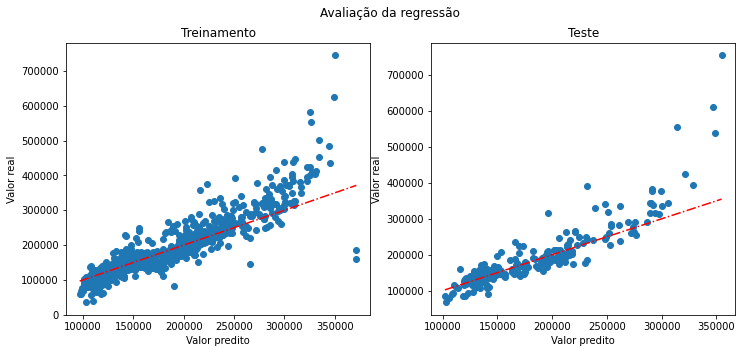

In [67]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plot_predicted_vs_actual_values(y_train, y_pred_train, "Treinamento")

plt.subplot(1,2,2)
plot_predicted_vs_actual_values(y_test, y_pred_test, "Teste")

plt.suptitle("Avaliação da regressão")

Vemos, assim, como obtivemos um modelo menos sobreajustado aos dados! (Isso é evidenciado pelo maior erro no conjunto de treinamento)

___

### Pipeline

Repare que, sempre que executamos as etapas do ciclo de modelagem em ML, estamos aplicando uma mesma sequência de passos, particularizada a cada problema. Podemos "encapsular" o passo a passo que queremos aplicar a cada modelo com os [**pipelines**](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) do scikit-learn.

O Pipeline é uma estrutura que o sklearn proporciona a fim de garantir que possamos em uma única estrutura passar **o estimador e o transformador** (e muitas outras coisas). Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/compose.html#pipeline). 

Vamos ver a seguir como esta estrutura funciona:

In [68]:
from sklearn.pipeline import Pipeline

In [69]:
# Para definir o Pipeline, podemos estruturar uma lista de etapas referentes ao processamento de dados.
# No nosso caso, fizemos um scaling com o StandardScaler, e usamos o estimador "KNeighborsRegressor"

lista_etapas = [("std_scaler", StandardScaler()), ("knn", KNeighborsRegressor())]

In [70]:
lista_etapas

[('std_scaler', StandardScaler()), ('knn', KNeighborsRegressor())]

In [71]:
# Para definir o Pipeline, podemos estruturar uma lista de etapas referentes ao processamento de dados.
# No nosso caso, fizemos um scaling com o StandardScaler, e usamos o estimador "KNeighborsRegressor"

lista_etapas = [("std_scaler", StandardScaler()), ("knn", KNeighborsRegressor())]

# Criação do pipeline
pipe = Pipeline(lista_etapas)

In [72]:
pipe

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsRegressor())])

In [73]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [78]:
# Para definir o Pipeline, podemos estruturar uma lista de etapas referentes ao processamento de dados.
# No nosso caso, fizemos um scaling com o StandardScaler, e usamos o estimador "KNeighborsRegressor"
lista_etapas = [("std_scaler", StandardScaler()), ("knn", KNeighborsRegressor())]

# Criação do pipeline
pipe = Pipeline(lista_etapas)

# Validação cruzada
splitter = KFold(n_splits = 10, shuffle = True, random_state = 42)

# métrica de avaliação
metrica = "neg_mean_absolute_error"

# GridSearch
param_grid = {"knn__n_neighbors": range(50,100),
             "knn__metric": ["euclidean", "manhattan"],
             "knn__weights": ["uniform"]}

# GridSearch
grid_knn_reg = GridSearchCV(estimator = pipe,
                           param_grid = param_grid,
                           scoring = metrica,
                           cv = splitter,
                           verbose = 10)

grid_knn_reg.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START knn__metric=euclidean, knn__n_neighbors=50, knn__weights=uniform
[CV 1/10; 1/100] END knn__metric=euclidean, knn__n_neighbors=50, knn__weights=uniform;, score=-24195.604 total time=   0.0s
[CV 2/10; 1/100] START knn__metric=euclidean, knn__n_neighbors=50, knn__weights=uniform
[CV 2/10; 1/100] END knn__metric=euclidean, knn__n_neighbors=50, knn__weights=uniform;, score=-26808.943 total time=   0.0s
[CV 3/10; 1/100] START knn__metric=euclidean, knn__n_neighbors=50, knn__weights=uniform
[CV 3/10; 1/100] END knn__metric=euclidean, knn__n_neighbors=50, knn__weights=uniform;, score=-27161.696 total time=   0.0s
[CV 4/10; 1/100] START knn__metric=euclidean, knn__n_neighbors=50, knn__weights=uniform
[CV 4/10; 1/100] END knn__metric=euclidean, knn__n_neighbors=50, knn__weights=uniform;, score=-28764.870 total time=   0.0s
[CV 5/10; 1/100] START knn__metric=euclidean, knn__n_neighbors=50, knn__weights=uniform

[CV 10/10; 4/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-25589.255 total time=   0.0s
[CV 1/10; 5/100] START knn__metric=euclidean, knn__n_neighbors=54, knn__weights=uniform
[CV 1/10; 5/100] END knn__metric=euclidean, knn__n_neighbors=54, knn__weights=uniform;, score=-24404.778 total time=   0.0s
[CV 2/10; 5/100] START knn__metric=euclidean, knn__n_neighbors=54, knn__weights=uniform
[CV 2/10; 5/100] END knn__metric=euclidean, knn__n_neighbors=54, knn__weights=uniform;, score=-27243.985 total time=   0.0s
[CV 3/10; 5/100] START knn__metric=euclidean, knn__n_neighbors=54, knn__weights=uniform
[CV 3/10; 5/100] END knn__metric=euclidean, knn__n_neighbors=54, knn__weights=uniform;, score=-27302.735 total time=   0.0s
[CV 4/10; 5/100] START knn__metric=euclidean, knn__n_neighbors=54, knn__weights=uniform
[CV 4/10; 5/100] END knn__metric=euclidean, knn__n_neighbors=54, knn__weights=uniform;, score=-28942.074 total time=   0.0s
[CV 5/10; 5/100] START knn_

[CV 1/10; 10/100] END knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform;, score=-24527.365 total time=   0.0s
[CV 2/10; 10/100] START knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform
[CV 2/10; 10/100] END knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform;, score=-27887.423 total time=   0.0s
[CV 3/10; 10/100] START knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform
[CV 3/10; 10/100] END knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform;, score=-27700.152 total time=   0.0s
[CV 4/10; 10/100] START knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform
[CV 4/10; 10/100] END knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform;, score=-29377.741 total time=   0.0s
[CV 5/10; 10/100] START knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform
[CV 5/10; 10/100] END knn__metric=euclidean, knn__n_neighbors=59, knn__weights=uniform;, score=-23307.243 total time=   0.0s
[CV 6/10; 10/100] S

[CV 3/10; 15/100] END knn__metric=euclidean, knn__n_neighbors=64, knn__weights=uniform;, score=-28382.802 total time=   0.0s
[CV 4/10; 15/100] START knn__metric=euclidean, knn__n_neighbors=64, knn__weights=uniform
[CV 4/10; 15/100] END knn__metric=euclidean, knn__n_neighbors=64, knn__weights=uniform;, score=-29472.912 total time=   0.0s
[CV 5/10; 15/100] START knn__metric=euclidean, knn__n_neighbors=64, knn__weights=uniform
[CV 5/10; 15/100] END knn__metric=euclidean, knn__n_neighbors=64, knn__weights=uniform;, score=-23572.918 total time=   0.0s
[CV 6/10; 15/100] START knn__metric=euclidean, knn__n_neighbors=64, knn__weights=uniform
[CV 6/10; 15/100] END knn__metric=euclidean, knn__n_neighbors=64, knn__weights=uniform;, score=-17936.450 total time=   0.0s
[CV 7/10; 15/100] START knn__metric=euclidean, knn__n_neighbors=64, knn__weights=uniform
[CV 7/10; 15/100] END knn__metric=euclidean, knn__n_neighbors=64, knn__weights=uniform;, score=-24529.219 total time=   0.0s
[CV 8/10; 15/100] S

[CV 1/10; 20/100] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform;, score=-24440.155 total time=   0.0s
[CV 2/10; 20/100] START knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform
[CV 2/10; 20/100] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform;, score=-28810.187 total time=   0.0s
[CV 3/10; 20/100] START knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform
[CV 3/10; 20/100] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform;, score=-28767.003 total time=   0.0s
[CV 4/10; 20/100] START knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform
[CV 4/10; 20/100] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform;, score=-29747.164 total time=   0.0s
[CV 5/10; 20/100] START knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform
[CV 5/10; 20/100] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform;, score=-23686.190 total time=   0.0s
[CV 6/10; 20/100] S

[CV 9/10; 24/100] END knn__metric=euclidean, knn__n_neighbors=73, knn__weights=uniform;, score=-28495.336 total time=   0.0s
[CV 10/10; 24/100] START knn__metric=euclidean, knn__n_neighbors=73, knn__weights=uniform
[CV 10/10; 24/100] END knn__metric=euclidean, knn__n_neighbors=73, knn__weights=uniform;, score=-26772.460 total time=   0.0s
[CV 1/10; 25/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 1/10; 25/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-24538.162 total time=   0.0s
[CV 2/10; 25/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 2/10; 25/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-28968.614 total time=   0.0s
[CV 3/10; 25/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 3/10; 25/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-29158.514 total time=   0.0s
[CV 4/10; 25/100]

[CV 9/10; 29/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-28555.116 total time=   0.0s
[CV 10/10; 29/100] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform
[CV 10/10; 29/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-26830.675 total time=   0.0s
[CV 1/10; 30/100] START knn__metric=euclidean, knn__n_neighbors=79, knn__weights=uniform
[CV 1/10; 30/100] END knn__metric=euclidean, knn__n_neighbors=79, knn__weights=uniform;, score=-24704.990 total time=   0.0s
[CV 2/10; 30/100] START knn__metric=euclidean, knn__n_neighbors=79, knn__weights=uniform
[CV 2/10; 30/100] END knn__metric=euclidean, knn__n_neighbors=79, knn__weights=uniform;, score=-29081.137 total time=   0.0s
[CV 3/10; 30/100] START knn__metric=euclidean, knn__n_neighbors=79, knn__weights=uniform
[CV 3/10; 30/100] END knn__metric=euclidean, knn__n_neighbors=79, knn__weights=uniform;, score=-29270.120 total time=   0.0s
[CV 4/10; 30/100]

[CV 10/10; 33/100] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform;, score=-26904.482 total time=   0.0s
[CV 1/10; 34/100] START knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform
[CV 1/10; 34/100] END knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform;, score=-24649.476 total time=   0.0s
[CV 2/10; 34/100] START knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform
[CV 2/10; 34/100] END knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform;, score=-29415.644 total time=   0.0s
[CV 3/10; 34/100] START knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform
[CV 3/10; 34/100] END knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform;, score=-29315.065 total time=   0.0s
[CV 4/10; 34/100] START knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform
[CV 4/10; 34/100] END knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform;, score=-30339.438 total time=   0.0s
[CV 5/10; 34/100] 

[CV 2/10; 38/100] END knn__metric=euclidean, knn__n_neighbors=87, knn__weights=uniform;, score=-29568.920 total time=   0.0s
[CV 3/10; 38/100] START knn__metric=euclidean, knn__n_neighbors=87, knn__weights=uniform
[CV 3/10; 38/100] END knn__metric=euclidean, knn__n_neighbors=87, knn__weights=uniform;, score=-29349.040 total time=   0.0s
[CV 4/10; 38/100] START knn__metric=euclidean, knn__n_neighbors=87, knn__weights=uniform
[CV 4/10; 38/100] END knn__metric=euclidean, knn__n_neighbors=87, knn__weights=uniform;, score=-30440.915 total time=   0.0s
[CV 5/10; 38/100] START knn__metric=euclidean, knn__n_neighbors=87, knn__weights=uniform
[CV 5/10; 38/100] END knn__metric=euclidean, knn__n_neighbors=87, knn__weights=uniform;, score=-24351.890 total time=   0.0s
[CV 6/10; 38/100] START knn__metric=euclidean, knn__n_neighbors=87, knn__weights=uniform
[CV 6/10; 38/100] END knn__metric=euclidean, knn__n_neighbors=87, knn__weights=uniform;, score=-18656.932 total time=   0.0s
[CV 7/10; 38/100] S

[CV 2/10; 42/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-29658.138 total time=   0.0s
[CV 3/10; 42/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 3/10; 42/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-29507.817 total time=   0.0s
[CV 4/10; 42/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 4/10; 42/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-30451.637 total time=   0.0s
[CV 5/10; 42/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 5/10; 42/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-24271.785 total time=   0.0s
[CV 6/10; 42/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 6/10; 42/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-18709.411 total time=   0.0s
[CV 7/10; 42/100] S

[CV 5/10; 46/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-24256.514 total time=   0.0s
[CV 6/10; 46/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 6/10; 46/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-18914.896 total time=   0.0s
[CV 7/10; 46/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 7/10; 46/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-25746.988 total time=   0.0s
[CV 8/10; 46/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 8/10; 46/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-27356.100 total time=   0.0s
[CV 9/10; 46/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 9/10; 46/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-29184.137 total time=   0.0s
[CV 10/10; 46/100] 

[CV 7/10; 50/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-25924.932 total time=   0.0s
[CV 8/10; 50/100] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 8/10; 50/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-27462.462 total time=   0.0s
[CV 9/10; 50/100] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 9/10; 50/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-29337.034 total time=   0.0s
[CV 10/10; 50/100] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 10/10; 50/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-27010.982 total time=   0.0s
[CV 1/10; 51/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 1/10; 51/100] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-22931.016 total time=   0.0s
[CV 2/10; 51/100]

[CV 7/10; 55/100] END knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform;, score=-23276.215 total time=   0.0s
[CV 8/10; 55/100] START knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform
[CV 8/10; 55/100] END knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform;, score=-24924.191 total time=   0.0s
[CV 9/10; 55/100] START knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform
[CV 9/10; 55/100] END knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform;, score=-25079.747 total time=   0.0s
[CV 10/10; 55/100] START knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform
[CV 10/10; 55/100] END knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform;, score=-23658.606 total time=   0.0s
[CV 1/10; 56/100] START knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform
[CV 1/10; 56/100] END knn__metric=manhattan, knn__n_neighbors=55, knn__weights=uniform;, score=-23012.462 total time=   0.0s
[CV 2/10; 56/100]

[CV 5/10; 60/100] END knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform;, score=-22127.766 total time=   0.0s
[CV 6/10; 60/100] START knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform
[CV 6/10; 60/100] END knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform;, score=-17131.911 total time=   0.0s
[CV 7/10; 60/100] START knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform
[CV 7/10; 60/100] END knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform;, score=-23875.674 total time=   0.0s
[CV 8/10; 60/100] START knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform
[CV 8/10; 60/100] END knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform;, score=-25111.051 total time=   0.0s
[CV 9/10; 60/100] START knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform
[CV 9/10; 60/100] END knn__metric=manhattan, knn__n_neighbors=59, knn__weights=uniform;, score=-25321.193 total time=   0.0s
[CV 10/10; 60/100] 

[CV 3/10; 65/100] END knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform;, score=-26867.806 total time=   0.0s
[CV 4/10; 65/100] START knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform
[CV 4/10; 65/100] END knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform;, score=-27361.337 total time=   0.0s
[CV 5/10; 65/100] START knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform
[CV 5/10; 65/100] END knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform;, score=-22428.585 total time=   0.0s
[CV 6/10; 65/100] START knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform
[CV 6/10; 65/100] END knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform;, score=-17150.344 total time=   0.0s
[CV 7/10; 65/100] START knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform
[CV 7/10; 65/100] END knn__metric=manhattan, knn__n_neighbors=64, knn__weights=uniform;, score=-24067.953 total time=   0.0s
[CV 8/10; 65/100] S

[CV 1/10; 70/100] END knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform;, score=-23541.724 total time=   0.0s
[CV 2/10; 70/100] START knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform
[CV 2/10; 70/100] END knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform;, score=-27289.937 total time=   0.0s
[CV 3/10; 70/100] START knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform
[CV 3/10; 70/100] END knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform;, score=-26953.535 total time=   0.0s
[CV 4/10; 70/100] START knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform
[CV 4/10; 70/100] END knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform;, score=-27404.141 total time=   0.0s
[CV 5/10; 70/100] START knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform
[CV 5/10; 70/100] END knn__metric=manhattan, knn__n_neighbors=69, knn__weights=uniform;, score=-22635.577 total time=   0.0s
[CV 6/10; 70/100] S

[CV 9/10; 74/100] END knn__metric=manhattan, knn__n_neighbors=73, knn__weights=uniform;, score=-25785.795 total time=   0.0s
[CV 10/10; 74/100] START knn__metric=manhattan, knn__n_neighbors=73, knn__weights=uniform
[CV 10/10; 74/100] END knn__metric=manhattan, knn__n_neighbors=73, knn__weights=uniform;, score=-24641.339 total time=   0.0s
[CV 1/10; 75/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 1/10; 75/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-23475.582 total time=   0.0s
[CV 2/10; 75/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 2/10; 75/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-27606.608 total time=   0.0s
[CV 3/10; 75/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 3/10; 75/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-27504.620 total time=   0.0s
[CV 4/10; 75/100]

[CV 9/10; 79/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-26113.735 total time=   0.0s
[CV 10/10; 79/100] START knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform
[CV 10/10; 79/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-25024.820 total time=   0.0s
[CV 1/10; 80/100] START knn__metric=manhattan, knn__n_neighbors=79, knn__weights=uniform
[CV 1/10; 80/100] END knn__metric=manhattan, knn__n_neighbors=79, knn__weights=uniform;, score=-23615.546 total time=   0.0s
[CV 2/10; 80/100] START knn__metric=manhattan, knn__n_neighbors=79, knn__weights=uniform
[CV 2/10; 80/100] END knn__metric=manhattan, knn__n_neighbors=79, knn__weights=uniform;, score=-27564.720 total time=   0.0s
[CV 3/10; 80/100] START knn__metric=manhattan, knn__n_neighbors=79, knn__weights=uniform
[CV 3/10; 80/100] END knn__metric=manhattan, knn__n_neighbors=79, knn__weights=uniform;, score=-28207.424 total time=   0.0s
[CV 4/10; 80/100]

[CV 5/10; 84/100] END knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform;, score=-23365.842 total time=   0.0s
[CV 6/10; 84/100] START knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform
[CV 6/10; 84/100] END knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform;, score=-17780.922 total time=   0.0s
[CV 7/10; 84/100] START knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform
[CV 7/10; 84/100] END knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform;, score=-24613.207 total time=   0.0s
[CV 8/10; 84/100] START knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform
[CV 8/10; 84/100] END knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform;, score=-25951.209 total time=   0.0s
[CV 9/10; 84/100] START knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform
[CV 9/10; 84/100] END knn__metric=manhattan, knn__n_neighbors=83, knn__weights=uniform;, score=-26278.640 total time=   0.0s
[CV 10/10; 84/100] 

[CV 9/10; 88/100] END knn__metric=manhattan, knn__n_neighbors=87, knn__weights=uniform;, score=-26477.798 total time=   0.0s
[CV 10/10; 88/100] START knn__metric=manhattan, knn__n_neighbors=87, knn__weights=uniform
[CV 10/10; 88/100] END knn__metric=manhattan, knn__n_neighbors=87, knn__weights=uniform;, score=-25265.990 total time=   0.0s
[CV 1/10; 89/100] START knn__metric=manhattan, knn__n_neighbors=88, knn__weights=uniform
[CV 1/10; 89/100] END knn__metric=manhattan, knn__n_neighbors=88, knn__weights=uniform;, score=-23728.459 total time=   0.0s
[CV 2/10; 89/100] START knn__metric=manhattan, knn__n_neighbors=88, knn__weights=uniform
[CV 2/10; 89/100] END knn__metric=manhattan, knn__n_neighbors=88, knn__weights=uniform;, score=-27964.867 total time=   0.0s
[CV 3/10; 89/100] START knn__metric=manhattan, knn__n_neighbors=88, knn__weights=uniform
[CV 3/10; 89/100] END knn__metric=manhattan, knn__n_neighbors=88, knn__weights=uniform;, score=-28714.769 total time=   0.0s
[CV 4/10; 89/100]

[CV 7/10; 93/100] END knn__metric=manhattan, knn__n_neighbors=92, knn__weights=uniform;, score=-24769.994 total time=   0.0s
[CV 8/10; 93/100] START knn__metric=manhattan, knn__n_neighbors=92, knn__weights=uniform
[CV 8/10; 93/100] END knn__metric=manhattan, knn__n_neighbors=92, knn__weights=uniform;, score=-26219.463 total time=   0.0s
[CV 9/10; 93/100] START knn__metric=manhattan, knn__n_neighbors=92, knn__weights=uniform
[CV 9/10; 93/100] END knn__metric=manhattan, knn__n_neighbors=92, knn__weights=uniform;, score=-26753.464 total time=   0.0s
[CV 10/10; 93/100] START knn__metric=manhattan, knn__n_neighbors=92, knn__weights=uniform
[CV 10/10; 93/100] END knn__metric=manhattan, knn__n_neighbors=92, knn__weights=uniform;, score=-25349.210 total time=   0.0s
[CV 1/10; 94/100] START knn__metric=manhattan, knn__n_neighbors=93, knn__weights=uniform
[CV 1/10; 94/100] END knn__metric=manhattan, knn__n_neighbors=93, knn__weights=uniform;, score=-23954.149 total time=   0.0s
[CV 2/10; 94/100]

[CV 5/10; 98/100] END knn__metric=manhattan, knn__n_neighbors=97, knn__weights=uniform;, score=-23883.067 total time=   0.0s
[CV 6/10; 98/100] START knn__metric=manhattan, knn__n_neighbors=97, knn__weights=uniform
[CV 6/10; 98/100] END knn__metric=manhattan, knn__n_neighbors=97, knn__weights=uniform;, score=-18034.611 total time=   0.0s
[CV 7/10; 98/100] START knn__metric=manhattan, knn__n_neighbors=97, knn__weights=uniform
[CV 7/10; 98/100] END knn__metric=manhattan, knn__n_neighbors=97, knn__weights=uniform;, score=-25019.254 total time=   0.0s
[CV 8/10; 98/100] START knn__metric=manhattan, knn__n_neighbors=97, knn__weights=uniform
[CV 8/10; 98/100] END knn__metric=manhattan, knn__n_neighbors=97, knn__weights=uniform;, score=-26416.748 total time=   0.0s
[CV 9/10; 98/100] START knn__metric=manhattan, knn__n_neighbors=97, knn__weights=uniform
[CV 9/10; 98/100] END knn__metric=manhattan, knn__n_neighbors=97, knn__weights=uniform;, score=-26937.446 total time=   0.0s
[CV 10/10; 98/100] 

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(50, 100),
                         'knn__weights': ['uniform']},
             scoring='neg_mean_absolute_error', verbose=10)

In [76]:
grid_knn_reg

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(50, 100),
                         'knn__weights': ['uniform']},
             scoring='neg_mean_absolute_error', verbose=10)

In [79]:
# Avaliação com o GridSearch

# predições no próprio conjunto de treinamento
y_pred_train = grid_knn_reg.predict(X_train)
print_regression_evaluation_metrics(y_train, y_pred_train)
print("\n")
# predições no conjunto de teste
y_pred_test = grid_knn_reg.predict(X_test)
print_regression_evaluation_metrics(y_test, y_pred_test)

Métricas de avaliação: 
R^2: 0.77
MAE: 22564.92
RMSE: 38739.83
MAPE: 0.12


Métricas de avaliação: 
R^2: 0.70
MAE: 24995.13
RMSE: 48348.02
MAPE: 0.11


Text(0.5, 0.98, 'Avaliação da regressão')

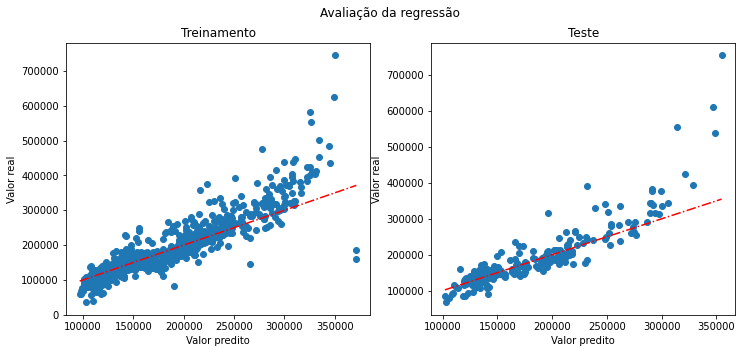

In [80]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plot_predicted_vs_actual_values(y_train, y_pred_train, "Treinamento")

plt.subplot(1,2,2)
plot_predicted_vs_actual_values(y_test, y_pred_test, "Teste")

plt.suptitle("Avaliação da regressão")

Temos, assim, o mesmo resultado que o anterior!

Ao longo das próximas aulas, continuaremos a utilizar o Pipeline, para evidenciar como este recurso pode nos auxiliar no ciclo de modelagem em ML!